# Project : Co2 Emission Prediction by cars.

**Business Objective:**
    
The fundamental goal here is to model the CO2 emissions as a function of several car engines features.

**Data Set Details:** 
    
The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385. In that way, this problem has the 12 following variables:

make, car brand under study.

model, the specific model of the car.

vehicle_class, car body type of the car.

engine_size, size of the car engine, in Litres.

cylinders, number of cylinders.

transmission, "A" for 'Automatic', "AM" for 'Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously variable', "M" for 'Manual'.

fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.

fuel_consumption_city, City fuel consumption ratings, in litres per 100 kilometres.

fuel_consumption_hwy, Highway fuel consumption ratings, in litres per 100 kilometres.

fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km.

fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).

co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.

**Acceptance Criterion**: Need to deploy the end results using Flask /Streamlit etc.

## Importing Required Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import set_printoptions
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,roc_auc_score, roc_curve 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

## Importing Required Dataset:

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/ExcelR Project/co2_emissions.csv", sep = ';')
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


## Performing EDA:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [4]:
df.shape

(7385, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [6]:
#Checking null values:

df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [7]:
#Checking duplicated values:

df[df.duplicated()].sum()

make                              ACURAACURAALFA ROMEOASTON MARTINASTON MARTINAS...
model                             RDX AWDRLX4CDB9V8 VANTAGEV8 VANTAGE SA6 QUATTR...
vehicle_class                     SUV - SMALLMID-SIZETWO-SEATERMINICOMPACTTWO-SE...
engine_size                                                                  3495.6
cylinders                                                                      6209
transmission                      ASASAMAAMAMASASASASASASASASASAMAMMAASASASASASM...
fuel_type                         ZZZZZZZDDDDZDDZZZZXXXXXXZXDXXXXXXXXXXXXEXXEXEX...
fuel_consumption_city                                                       13592.4
fuel_consumption_hwy                                                         9855.4
fuel_consumption_comb(l/100km)                                              11909.2
fuel_consumption_comb(mpg)                                                    31103
co2_emissions                                                               

In [8]:
df[df.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [9]:
#Dropping Duplicates:

df.drop_duplicates(inplace = True)
df.reset_index(inplace=True, drop=True)

In [10]:
df.shape

(6273, 12)

In [11]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   object 
 1   model                           6273 non-null   object 
 2   vehicle_class                   6273 non-null   object 
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   object 
 6   fuel_type                       6273 non-null   object 
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [12]:
#Renaming columns:

df1 = df1.rename(columns = {'make':'Make', 'model':'Model', 'vehicle_class':'VC','engine_size':'ES','cylinders':'CYL','transmission':'TR','fuel_type':'FT','fuel_consumption_city':'FC_city','fuel_consumption_hwy':'FC_hwy','fuel_consumption_comb(l/100km)':'FC_comb_km','fuel_consumption_comb(mpg)':'FC_comb_mpg','co2_emissions':'CO2'})
df1.head()

,Make,Model,VC,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,FC_comb_mpg,CO2
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [13]:
#summarizing new data:

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ES,6273.0,3.163000,1.365294,0.9,2.0,3.0,3.7,8.4
CYL,6273.0,5.620596,1.846424,3.0,4.0,6.0,6.0,16.0
FC_city,6273.0,12.615591,3.550572,4.2,10.1,12.1,14.7,30.6
FC_hwy,6273.0,9.073426,2.277893,4.0,7.5,8.7,10.3,20.6
FC_comb_km,6273.0,11.022111,2.945028,4.1,8.9,10.6,12.7,26.1
FC_comb_mpg,6273.0,27.395026,7.225472,11.0,22.0,27.0,32.0,69.0
CO2,6273.0,251.247250,59.235396,96.0,208.0,246.0,289.0,522.0


## Plotting the data:

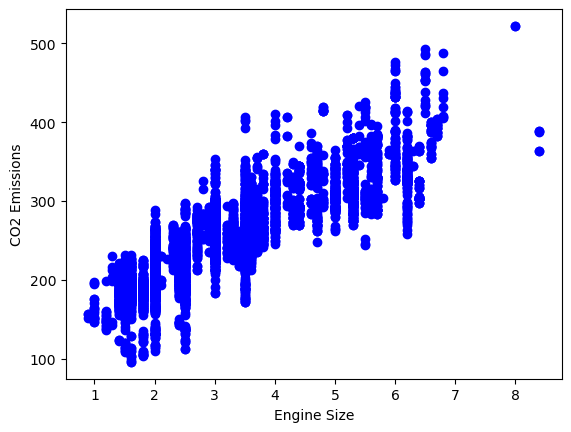

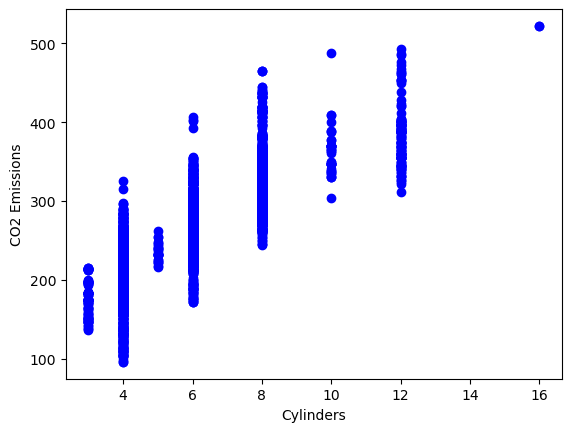

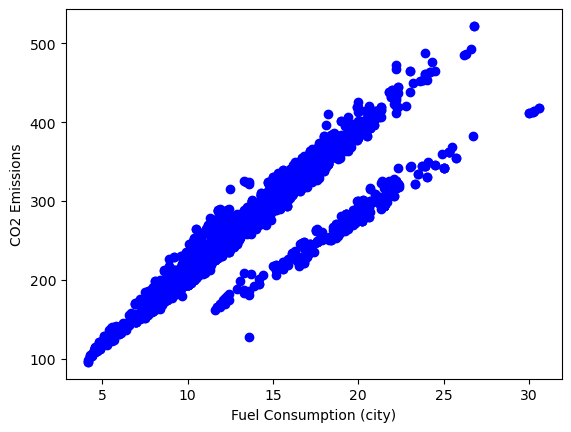

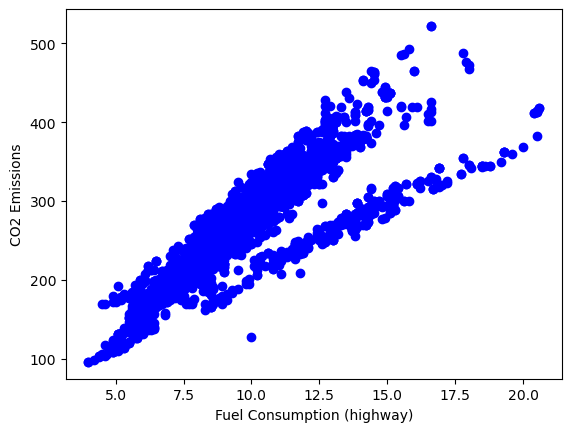

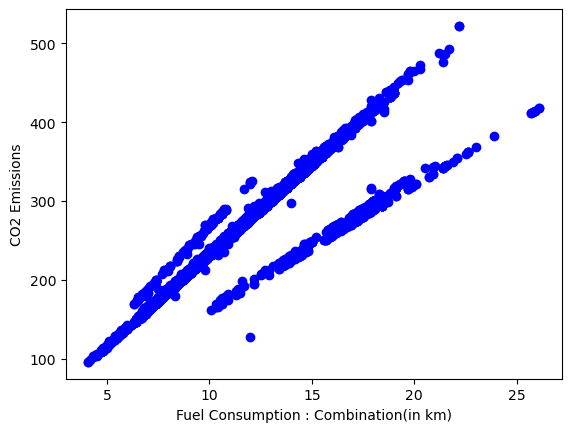

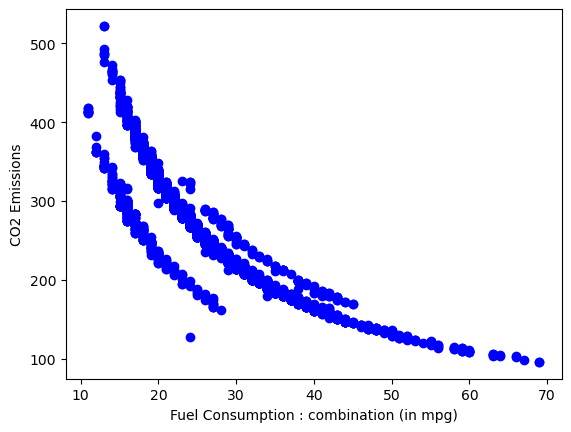

In [14]:
plt.scatter(df1.ES, df1.CO2, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

plt.scatter(df1.CYL, df1.CO2, color = 'blue')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()

plt.scatter(df1.FC_city, df1.CO2, color = 'blue')
plt.xlabel("Fuel Consumption (city)")
plt.ylabel("CO2 Emissions")
plt.show()

plt.scatter(df1.FC_hwy, df1.CO2, color = 'blue')
plt.xlabel("Fuel Consumption (highway)")
plt.ylabel("CO2 Emissions")
plt.show()

plt.scatter(df1.FC_comb_km, df1.CO2, color = 'blue')
plt.xlabel("Fuel Consumption : Combination(in km)")
plt.ylabel("CO2 Emissions")
plt.show()



plt.scatter(df1.FC_comb_mpg, df1.CO2, color = 'blue')
plt.xlabel("Fuel Consumption : combination (in mpg)")
plt.ylabel("CO2 Emissions")
plt.show()

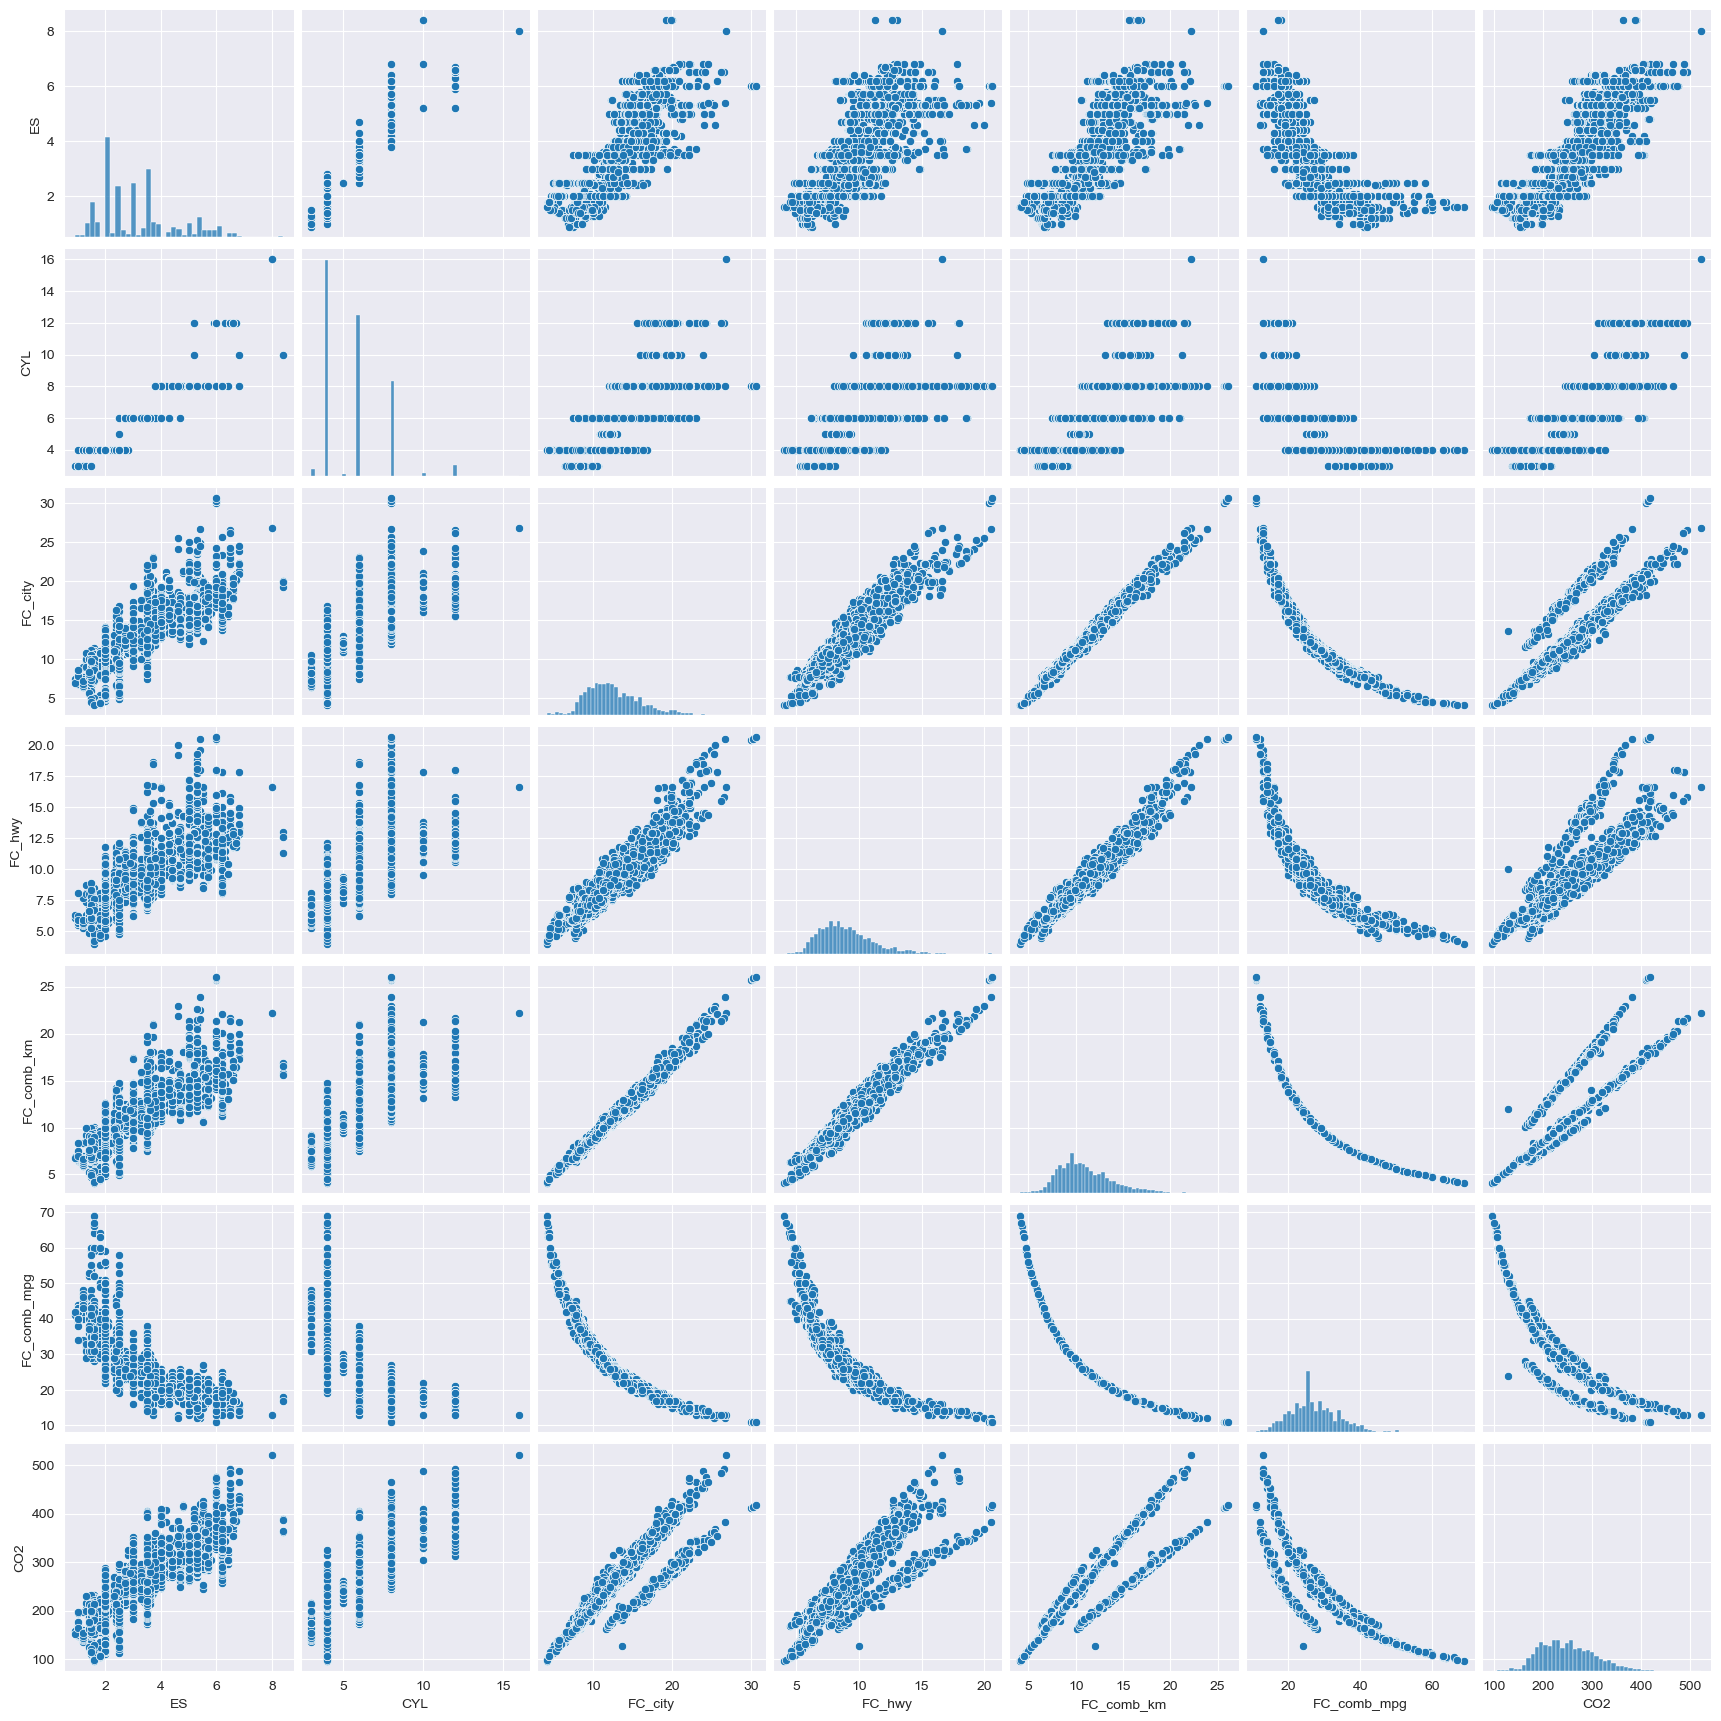

In [15]:
#Pairplot:

sns.set_style(style='darkgrid')
sns.pairplot(df1)

array([[<AxesSubplot:title={'center':'ES'}>,
        <AxesSubplot:title={'center':'CYL'}>,
        <AxesSubplot:title={'center':'FC_city'}>],
       [<AxesSubplot:title={'center':'FC_hwy'}>,
        <AxesSubplot:title={'center':'FC_comb_km'}>,
        <AxesSubplot:title={'center':'FC_comb_mpg'}>],
       [<AxesSubplot:title={'center':'CO2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

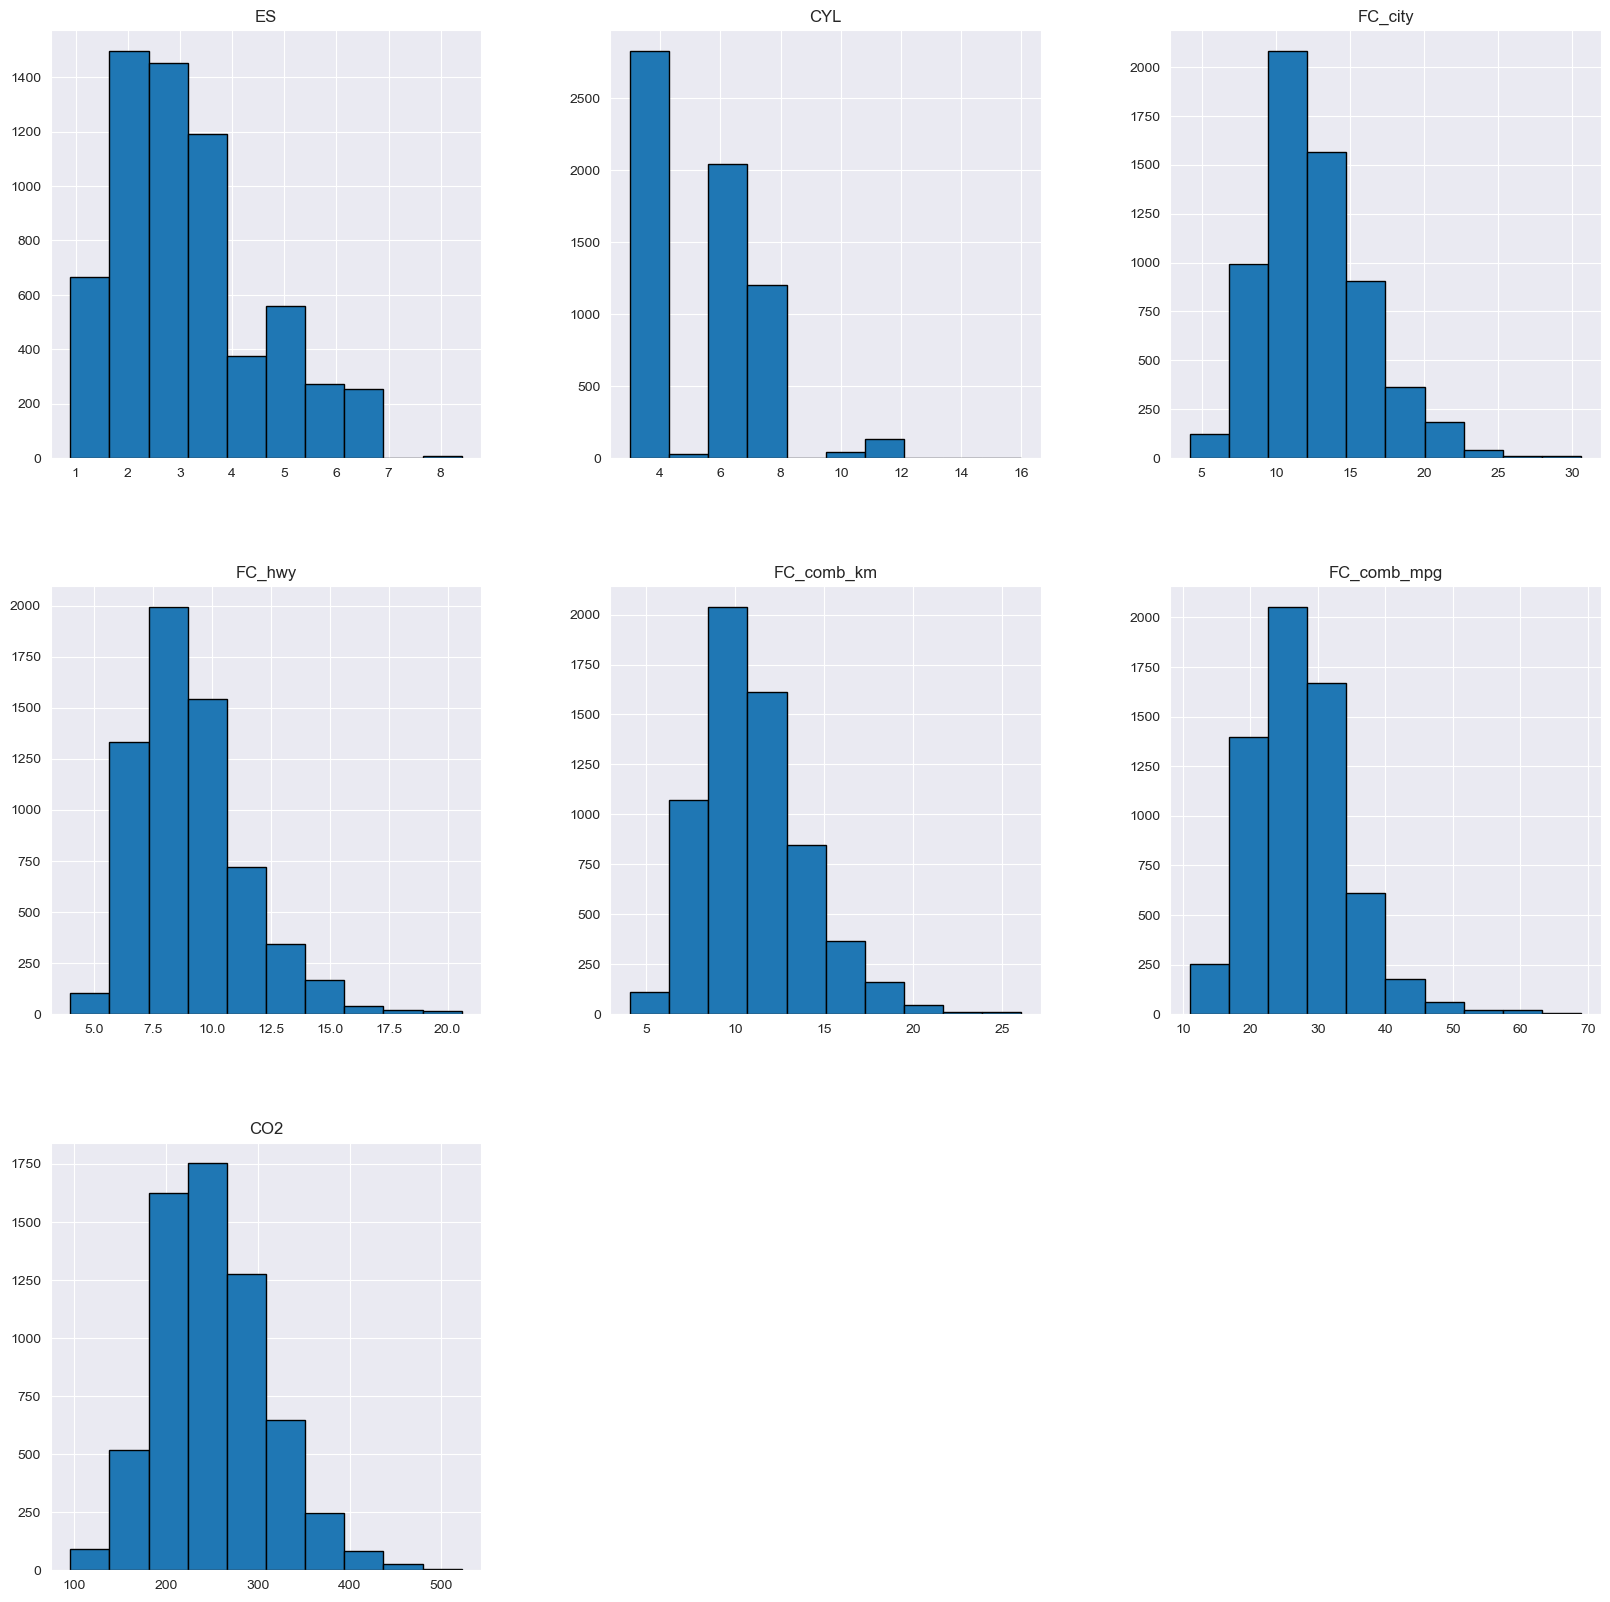

In [16]:
#Histograms:

df1.hist(edgecolor='black',figsize=(20,20),linewidth=1)

In [17]:
#Checking the Correlation:

df1.corr()

,ES,CYL,FC_city,FC_hwy,FC_comb_km,FC_comb_mpg,CO2
ES,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
CYL,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
FC_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
FC_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
FC_comb_km,0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
FC_comb_mpg,-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
CO2,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


<AxesSubplot:>

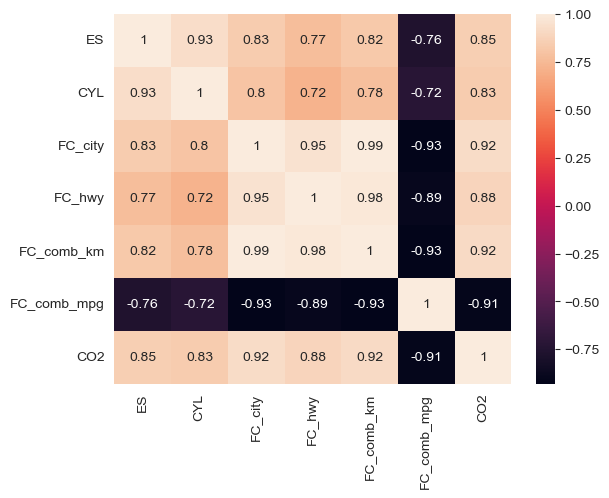

In [18]:
sns.heatmap(df1.corr(), annot=True)

* **Drop unnecessary columns:**

In [19]:
#Dropping Irrelevant Columns:

df1.drop(columns=['Make','Model','VC','FC_comb_mpg'], axis = 1, inplace = True)
df1.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,2.0,4,AS,Z,9.9,6.7,8.5,196
1,2.4,4,M,Z,11.2,7.7,9.6,221
2,1.5,4,AV,Z,6.0,5.8,5.9,136
3,3.5,6,AS,Z,12.7,9.1,11.1,255
4,3.5,6,AS,Z,12.1,8.7,10.6,244


## Label Encoding:

In [20]:
label_encoder = preprocessing.LabelEncoder() 

df1['TR']= label_encoder.fit_transform(df1['TR'])
df1['FT']= label_encoder.fit_transform(df1['FT'])

df1.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,2.0,4,2,4,9.9,6.7,8.5,196
1,2.4,4,4,4,11.2,7.7,9.6,221
2,1.5,4,3,4,6.0,5.8,5.9,136
3,3.5,6,2,4,12.7,9.1,11.1,255
4,3.5,6,2,4,12.1,8.7,10.6,244


## Finding Outliers in the Data:

In [21]:
df1.shape

(6273, 8)

<AxesSubplot:>

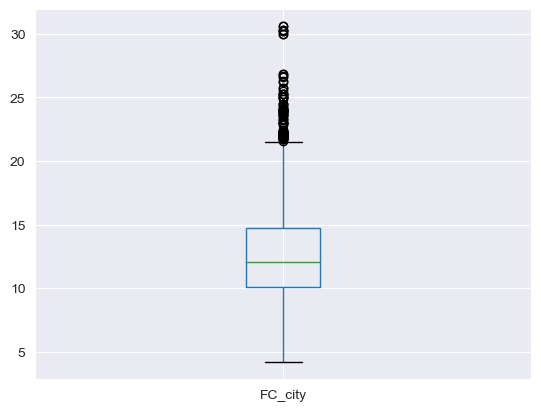

In [22]:
#Boxplot:

df1.boxplot(column=['FC_city'], grid = True)

In [23]:
df1.FC_city.describe()

count    6273.000000
mean       12.615591
std         3.550572
min         4.200000
25%        10.100000
50%        12.100000
75%        14.700000
max        30.600000
Name: FC_city, dtype: float64

In [24]:
df1.FC_city.quantile(0.99)

22.3

In [25]:
print("IQR =",14.70-10.10)

print("Upper Limit =",14.70 + 1.5*(14.70-10.10))

print("Lower Limit =", 10.10 - 1.5*(14.70-10.10))

IQR = 4.6
Upper Limit = 21.599999999999998
Lower Limit = 3.2


In [26]:
df1[df1['FC_city']>30]

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
228,6.0,8,0,1,30.2,20.5,25.8,413
452,6.0,8,0,1,30.2,20.5,25.8,413
1294,6.0,8,0,1,30.3,20.5,25.9,414
1298,6.0,8,0,1,30.6,20.6,26.1,418
1453,6.0,8,0,1,30.3,20.5,25.9,414
1457,6.0,8,0,1,30.6,20.6,26.1,418


<AxesSubplot:>

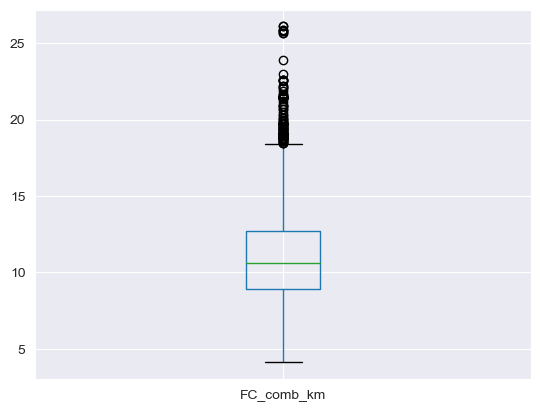

In [27]:
#Boxplot:

df1.boxplot(column=['FC_comb_km'], grid = True)

In [28]:
df1.FC_comb_km.describe()

count    6273.000000
mean       11.022111
std         2.945028
min         4.100000
25%         8.900000
50%        10.600000
75%        12.700000
max        26.100000
Name: FC_comb_km, dtype: float64

In [29]:
df1.FC_comb_km.quantile(0.99)

19.527999999999974

In [30]:
print("IQR =",12.70-8.90)

print("Upper Limit =",12.70 + 1.5*(12.70-8.90))

print("Lower Limit =", 8.90 - 1.5*(12.70-8.90))

IQR = 3.799999999999999
Upper Limit = 18.4
Lower Limit = 3.200000000000002


In [31]:
df1[df1['FC_comb_km']>25]

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
225,6.0,8,0,1,30.0,20.4,25.7,411
228,6.0,8,0,1,30.2,20.5,25.8,413
449,6.0,8,0,1,30.0,20.4,25.7,411
452,6.0,8,0,1,30.2,20.5,25.8,413
1294,6.0,8,0,1,30.3,20.5,25.9,414
1298,6.0,8,0,1,30.6,20.6,26.1,418
1453,6.0,8,0,1,30.3,20.5,25.9,414
1457,6.0,8,0,1,30.6,20.6,26.1,418


In [32]:
df1.drop(df1.index[[228,452,1294,1298,1453,1457]], inplace=True)
df1.shape

(6267, 8)

In [33]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,CO2
ES,0.854392
CYL,0.835009
TR,-0.325329
FT,0.100497
FC_city,0.919697
FC_hwy,0.883812
FC_comb_km,0.917867
CO2,1.000000


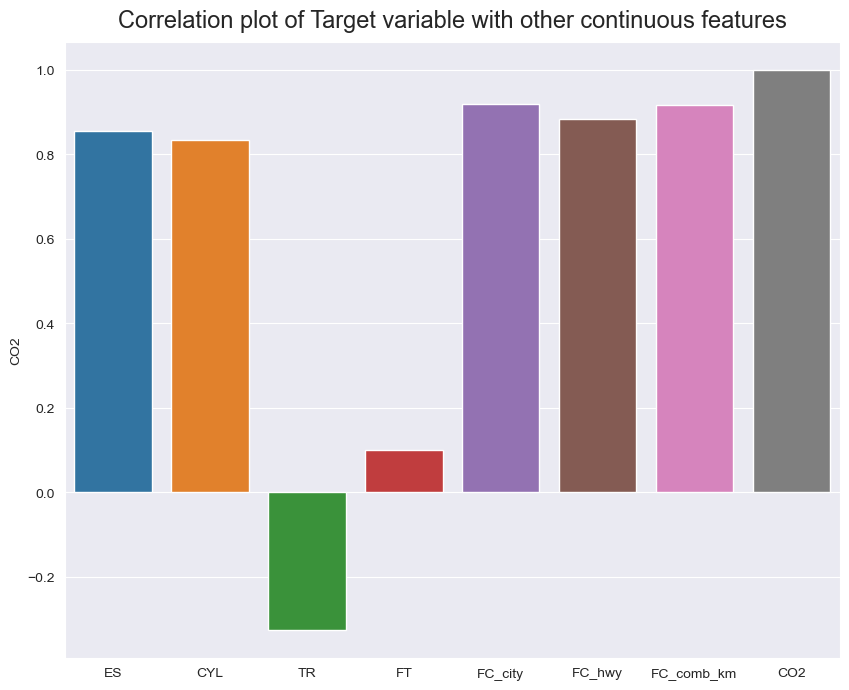

In [34]:
fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)
plt.show()

<AxesSubplot:>

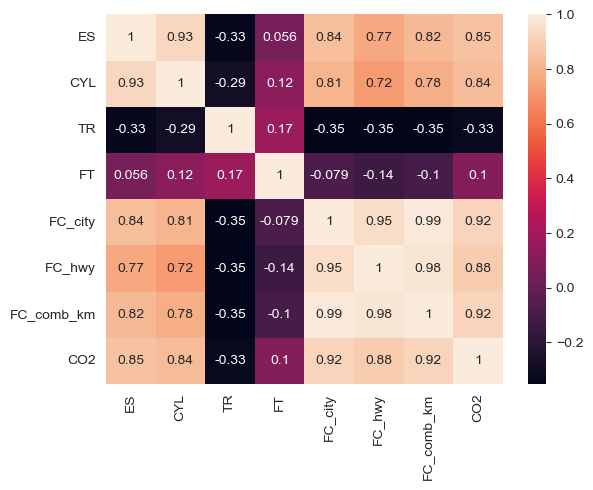

In [35]:
sns.heatmap(df1.corr(), annot=True)

## Scaling data:

In [36]:
#Normalisation of the Data:

#MinMaxScaler
#(Data Value - Minimum Value)/ Range Of The Data

In [37]:
array1= df1.values
array1

array([[  2. ,   4. ,   2. , ...,   6.7,   8.5, 196. ],
       [  2.4,   4. ,   4. , ...,   7.7,   9.6, 221. ],
       [  1.5,   4. ,   3. , ...,   5.8,   5.9, 136. ],
       ...,
       [  2. ,   4. ,   2. , ...,   8.6,  10.3, 240. ],
       [  2. ,   4. ,   2. , ...,   8.3,   9.9, 232. ],
       [  2. ,   4. ,   2. , ...,   8.7,  10.7, 248. ]])

In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array1)

In [39]:
rescaledX

array([[0.14666667, 0.07692308, 0.5       , ..., 0.16363636, 0.2037037 ,
        0.23474178],
       [0.2       , 0.07692308, 1.        , ..., 0.22424242, 0.25462963,
        0.29342723],
       [0.08      , 0.07692308, 0.75      , ..., 0.10909091, 0.08333333,
        0.09389671],
       ...,
       [0.14666667, 0.07692308, 0.5       , ..., 0.27878788, 0.28703704,
        0.33802817],
       [0.14666667, 0.07692308, 0.5       , ..., 0.26060606, 0.26851852,
        0.31924883],
       [0.14666667, 0.07692308, 0.5       , ..., 0.28484848, 0.30555556,
        0.35680751]])

In [40]:
#transformed data:

set_printoptions(precision=2)
print(rescaledX)

[[0.15 0.08 0.5  ... 0.16 0.2  0.23]
 [0.2  0.08 1.   ... 0.22 0.25 0.29]
 [0.08 0.08 0.75 ... 0.11 0.08 0.09]
 ...
 [0.15 0.08 0.5  ... 0.28 0.29 0.34]
 [0.15 0.08 0.5  ... 0.26 0.27 0.32]
 [0.15 0.08 0.5  ... 0.28 0.31 0.36]]


In [41]:
df2 = pd.DataFrame(rescaledX, columns=['ES','CYL','TR','FT','FC_city','FC_hwy','FC_comb_km','CO2'])
df2.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


### 1. Model Building using OLS Method:

In [42]:
model = smf.ols('CO2~ES+CYL+FT+TR+FC_city+FC_hwy+FC_comb_km',data=df2).fit()

In [43]:
model.fittedvalues

0       0.262791
1       0.303076
2       0.169049
3       0.392824
4       0.375685
          ...   
6262    0.294701
6263    0.312634
6264    0.326269
6265    0.312634
6266    0.339073
Length: 6267, dtype: float64

In [44]:
model.params

Intercept    -0.002757
ES            0.110166
CYL           0.114832
FT            0.096777
TR           -0.007573
FC_city       0.009429
FC_hwy        0.068528
FC_comb_km    0.659143
dtype: float64

In [45]:
df3 = df2.copy()
df3.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


In [46]:
df3['CO2_predicted'] = (-0.002757) + 0.110166*df3['ES'] + 0.114832*df3['CYL'] + 0.096777*df3['FT'] +(-0.007573)*df3['TR'] + (0.009429)*df3['FC_city']+ (0.068528)*df3['FC_hwy']+ 0.659143*df3['FC_comb_km']
df3['CO2_predicted_model'] = model.fittedvalues
df3.head(10)

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2,CO2_predicted,CO2_predicted_model
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742,0.262791,0.262791
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427,0.303076,0.303076
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897,0.169049,0.169049
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239,0.392823,0.392824
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418,0.375685,0.375685
5,0.346667,0.230769,0.50,1.0,0.298450,0.224242,0.273148,0.314554,0.353149,0.353149
6,0.346667,0.230769,0.50,1.0,0.294574,0.248485,0.277778,0.319249,0.357825,0.357825
7,0.373333,0.230769,0.50,1.0,0.333333,0.303030,0.324074,0.373239,0.395382,0.395382
8,0.373333,0.230769,1.00,1.0,0.356589,0.333333,0.347222,0.401408,0.409149,0.409150
9,0.200000,0.076923,0.50,1.0,0.248062,0.212121,0.236111,0.272300,0.293606,0.293607


In [47]:
y = df3['CO2']
y_predicted = df3['CO2_predicted_model']

In [48]:
mae = metrics.mean_absolute_error(y, y_predicted)
mse = metrics.mean_squared_error(y, y_predicted)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,y_predicted)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared (Accuracy):", r2)

Results of sklearn.metrics:
MAE: 0.029555546616579394
MSE: 0.0019344423060374731
RMSE: 0.04398229537026772
R-Squared (Accuracy): 0.8992937765122463


In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     7985.
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:11:12   Log-Likelihood:                 10685.
No. Observations:                6267   AIC:                        -2.135e+04
Df Residuals:                    6259   BIC:                        -2.130e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0028      0.003     -0.910      0.363      -0.009       0.003
ES             0.1102      0.009     12.134      0.000       0.092       0.128
CYL            0.1148      0.011     10.317      0.000       0.093       0.137
FT             0.0968      0.003     35.749      0.000       0.091       0.102
TR            -0.0076      0.002     -4.144      0.000      -0.011      -0.004
FC_city        0.0094      0.190      0.050      0.961      -0.364       0.383
FC_hwy         0.0685      0.100      0.682      0.495      -0.128       0.265
FC_comb_km     0.6591      0.289      2.280      0.023       0.092       1.226
==============================================================================
Omnibus:                      542.182   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3514.141
Skew:                          -0.073   Prob(JB):                         0.00
Kurtosis:                       6.666   Cond. No.                         991.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The Accuracy of the model is improved to 89.92 %**

In [50]:
#R-squared values:

(model.rsquared,model.rsquared_adj)

(0.8992937765122464, 0.8991811477273903)

In [51]:
# Finding tvalues and pvalues:

model.tvalues , np.round(model.pvalues,5)

(Intercept     -0.910336
 ES            12.133739
 CYL           10.317287
 FT            35.749268
 TR            -4.144093
 FC_city        0.049523
 FC_hwy         0.682348
 FC_comb_km     2.279843
 dtype: float64,
 Intercept     0.36268
 ES            0.00000
 CYL           0.00000
 FT            0.00000
 TR            0.00003
 FC_city       0.96050
 FC_hwy        0.49504
 FC_comb_km    0.02265
 dtype: float64)

Since, the **p-value** for **FC_city** and **FC_hwy** columns is **greater than 0.05**, we carry out Simple Linear Regression between CO2 and FC_city, CO2 and FC_hwy seperately.

In [52]:
# Build SLR model for insignificant variable 'FC_city'

slr_FC_city = smf.ols('CO2~FC_city', data = df2).fit()
(slr_FC_city.tvalues, slr_FC_city.pvalues)

(Intercept     33.084944
 FC_city      185.406201
 dtype: float64,
 Intercept    2.232661e-221
 FC_city       0.000000e+00
 dtype: float64)

#### FC_city has significant P-value.

In [53]:
# Build SLR model for insignificant variable 'FC_hwy'

slr_FC_hwy = smf.ols('CO2~FC_hwy', data = df2).fit()
(slr_FC_hwy.tvalues, slr_FC_hwy.pvalues)

(Intercept     43.933213
 FC_hwy       149.527285
 dtype: float64,
 Intercept    0.0
 FC_hwy       0.0
 dtype: float64)

**FC_hwy has significant P-value.**

## Model Validation Techniques:

#### Two Techniques:

**1. Collinearity Check,**

**2. Residual Analysis**

### Calculating VIF: (Variance Inflation Factor)

In [54]:
rsq_ES = smf.ols('ES~CYL+FT+TR+FC_city+FC_hwy+FC_comb_km',data=df2).fit().rsquared
vif_ES= 1/(1-rsq_ES)
vif_ES

8.809086120643476

In [55]:
rsq_CYL = smf.ols('CYL~ES+FT+TR+FC_city+FC_hwy+FC_comb_km',data=df2).fit().rsquared
vif_CYL= 1/(1-rsq_CYL)
vif_CYL

8.079369575414484

In [56]:
rsq_FT = smf.ols('FT~ES+CYL+TR+FC_city+FC_hwy+FC_comb_km',data=df2).fit().rsquared
vif_FT= 1/(1-rsq_FT)
vif_FT

1.1675475250784795

In [57]:
rsq_TR = smf.ols('TR~ES+CYL+FT+FC_city+FC_hwy+FC_comb_km',data=df2).fit().rsquared
vif_TR= 1/(1-rsq_TR)
vif_TR

1.1852468448466933

In [58]:
rsq_FC_city = smf.ols('FC_city~ES+CYL+FT+TR+FC_hwy+FC_comb_km',data=df2).fit().rsquared
vif_FC_city = 1/(1-rsq_FC_city)
vif_FC_city

2170.10665574722

In [59]:
rsq_FC_hwy = smf.ols('FC_hwy~ES+CYL+FT+TR+FC_city+FC_comb_km',data=df2).fit().rsquared
vif_FC_hwy = 1/(1-rsq_FC_hwy)
vif_FC_hwy

607.3871539355381

In [60]:
rsq_FC_comb_km = smf.ols('FC_comb_km~ES+CYL+FT+TR+FC_city+FC_hwy',data=df2).fit().rsquared
vif_FC_comb_km = 1/(1-rsq_FC_comb_km)
vif_FC_comb_km

4908.195037312197

In [61]:
#Storing vif values in a dataframe

d1={'Variables':['ES', 'CYL','TR','FT','FC_city', 'FC_hwy', 'FC_comb_km'],'VIF':[vif_ES,vif_CYL,vif_FT, vif_TR, vif_FC_city,vif_FC_hwy,vif_FC_comb_km]}
VIF_frame=pd.DataFrame(d1)
VIF_frame

,Variables,VIF
0,ES,8.809086
1,CYL,8.079370
2,TR,1.167548
3,FT,1.185247
4,FC_city,2170.106656
5,FC_hwy,607.387154
6,FC_comb_km,4908.195037


VIF Factor should not exceed 10, since it has higher VIF, Model accuracy will be impacted. So we have to get rid of one of the variable.

If VIF > 10, the dependent variable is sharing very high correlation with other independent variables.

## Test for Normality of Residuals: (Q-Q Plot)

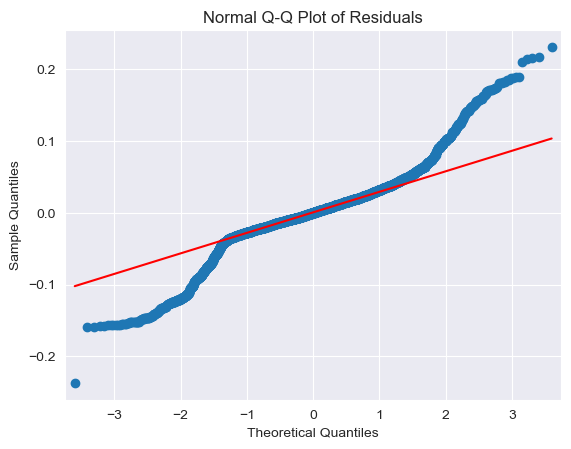

In [62]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line=45 to draw the diagonal line
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [63]:
list(np.where(model.resid>0.21))

[array([ 758, 1700, 2786, 3272, 4932], dtype=int64)]

In [64]:
list(np.where(model.resid<-0.2))

[array([3807], dtype=int64)]

<AxesSubplot:>

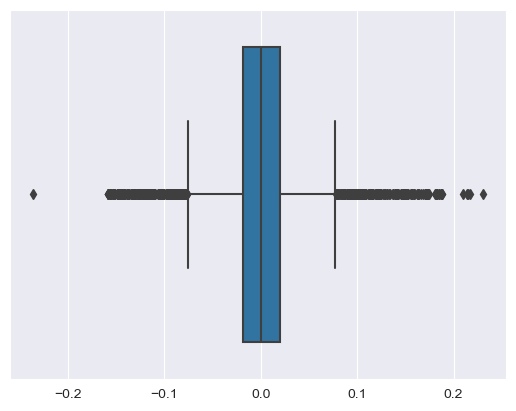

In [65]:
sns.boxplot(model.resid)

<AxesSubplot:ylabel='Count'>

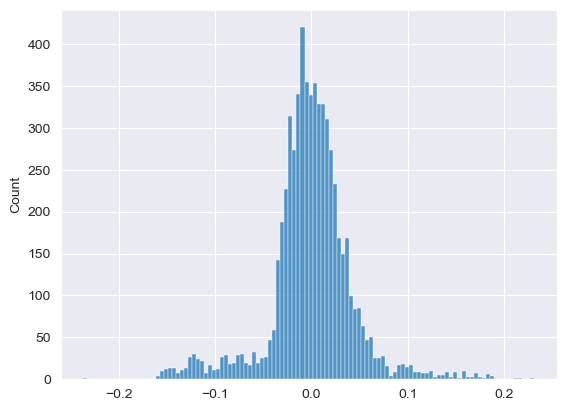

In [66]:
sns.histplot(model.resid)

<AxesSubplot:ylabel='Density'>

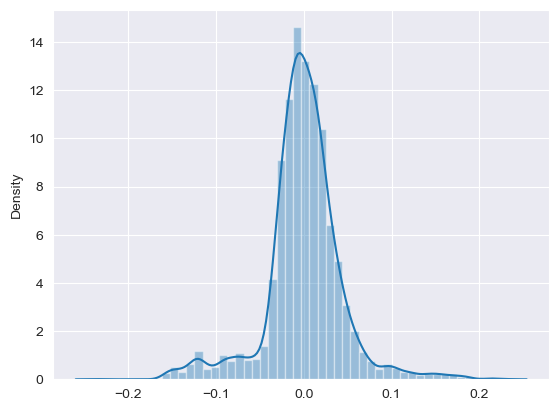

In [67]:
sns.distplot(model.resid)

## Residual Plot For Homoscedasticity:

In [68]:
def get_standardised_values(vals):
    return (vals-vals.mean())/vals.std()

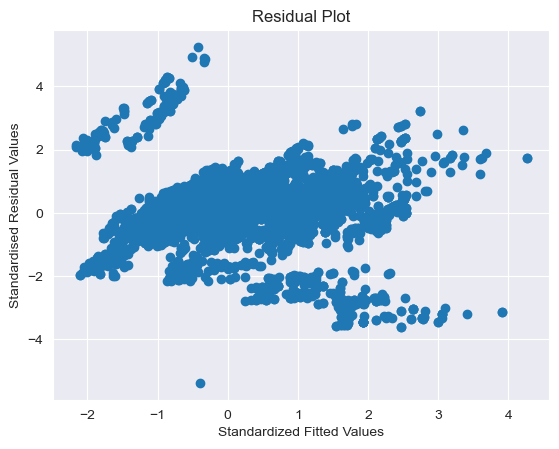

In [69]:
plt.scatter(get_standardised_values(model.fittedvalues),get_standardised_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardised Residual Values')
plt.show()

## Residual vs Regressors:

eval_env: 1


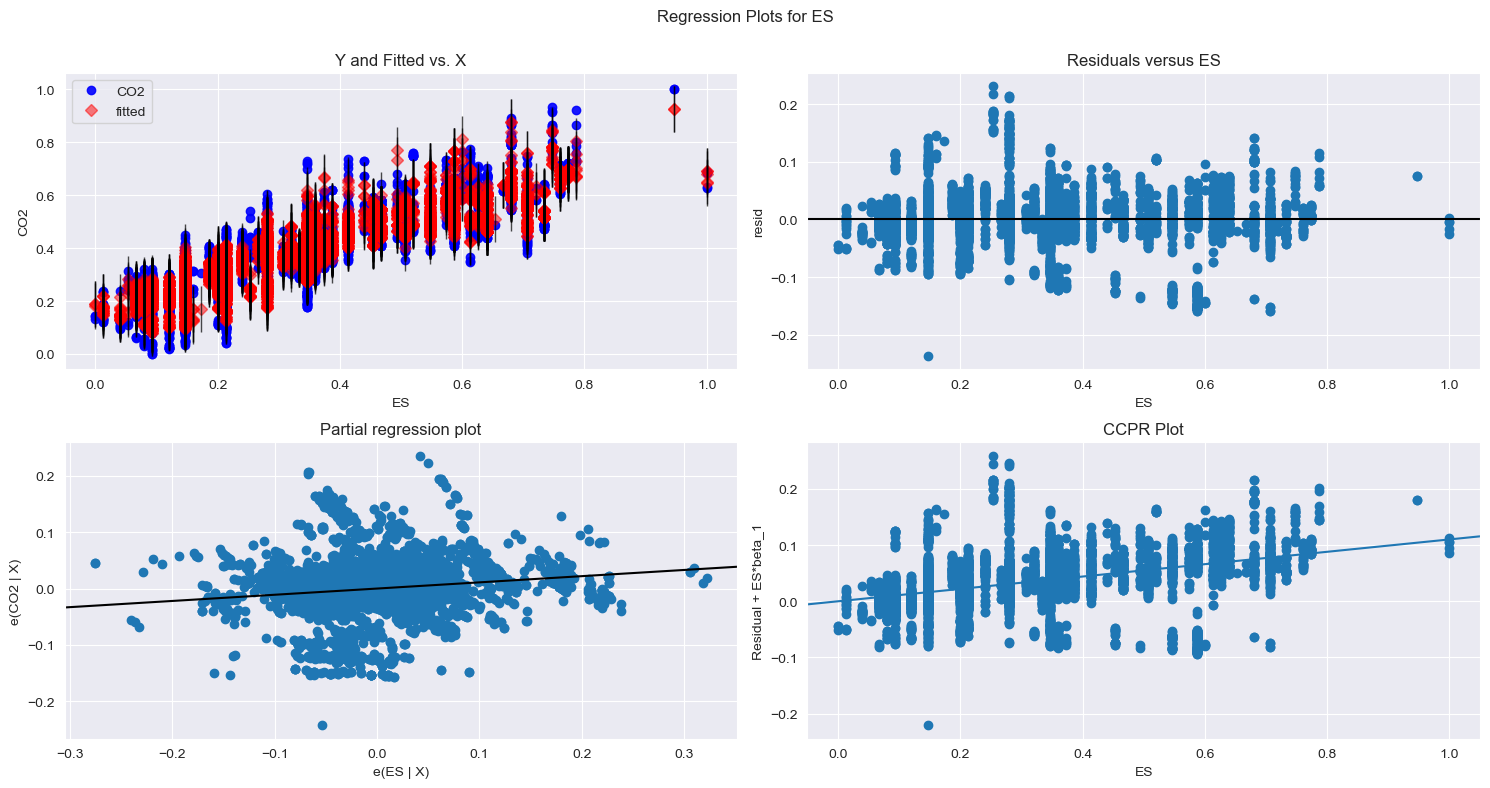

In [70]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'ES', fig=fig)
plt.show()

eval_env: 1


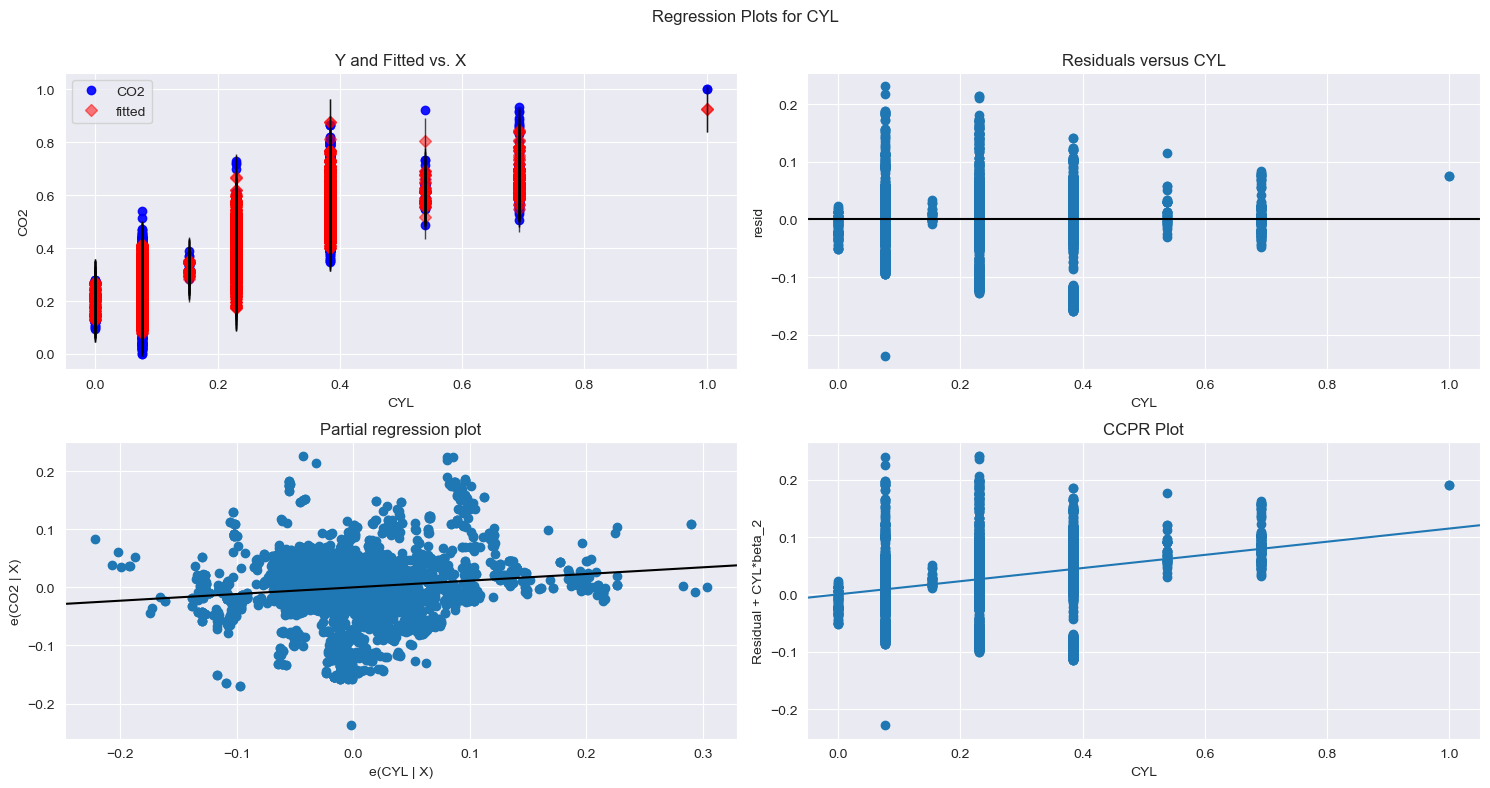

In [71]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'CYL', fig=fig)
plt.show()

eval_env: 1


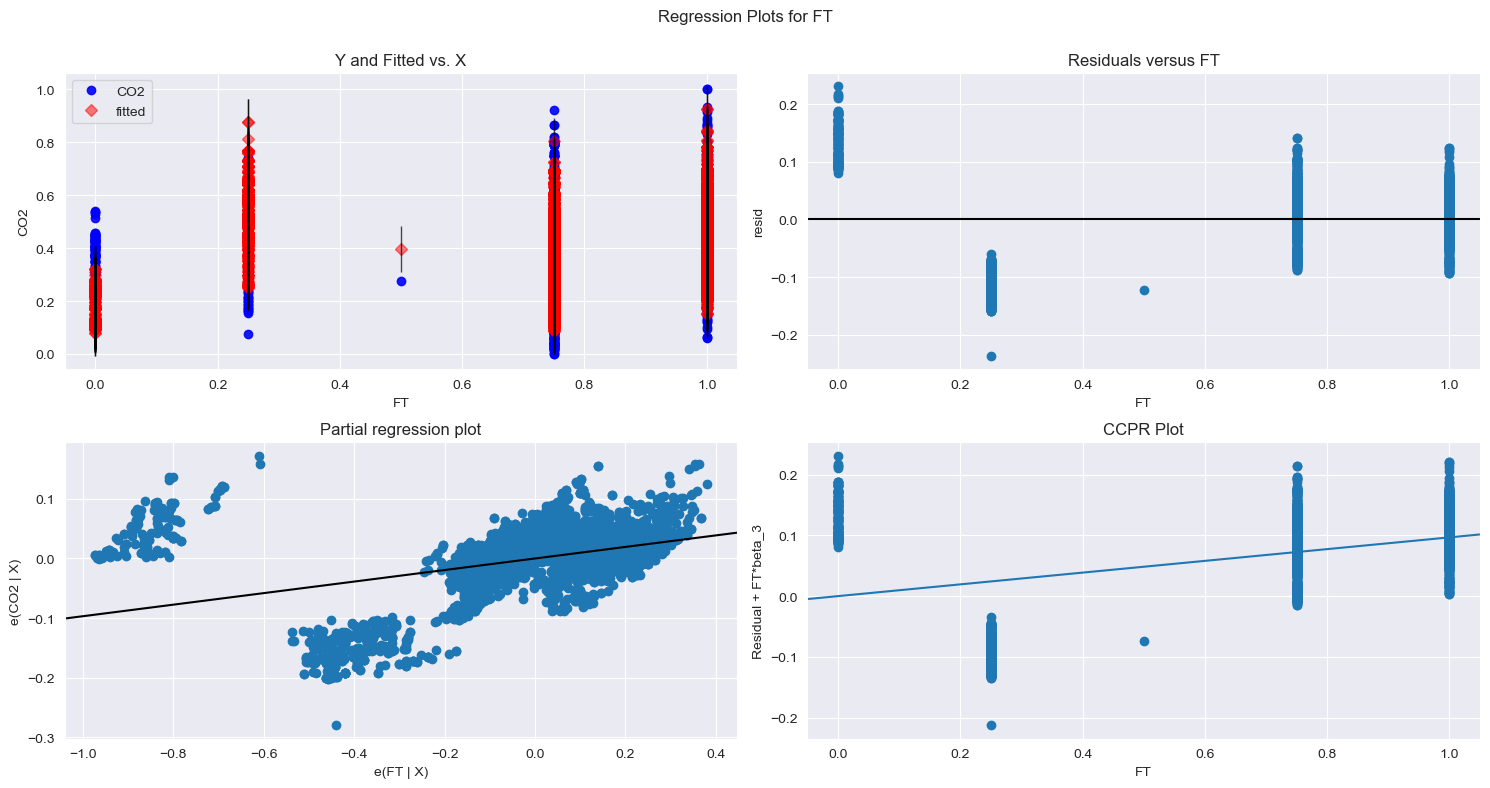

In [72]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'FT', fig=fig)
plt.show()

eval_env: 1


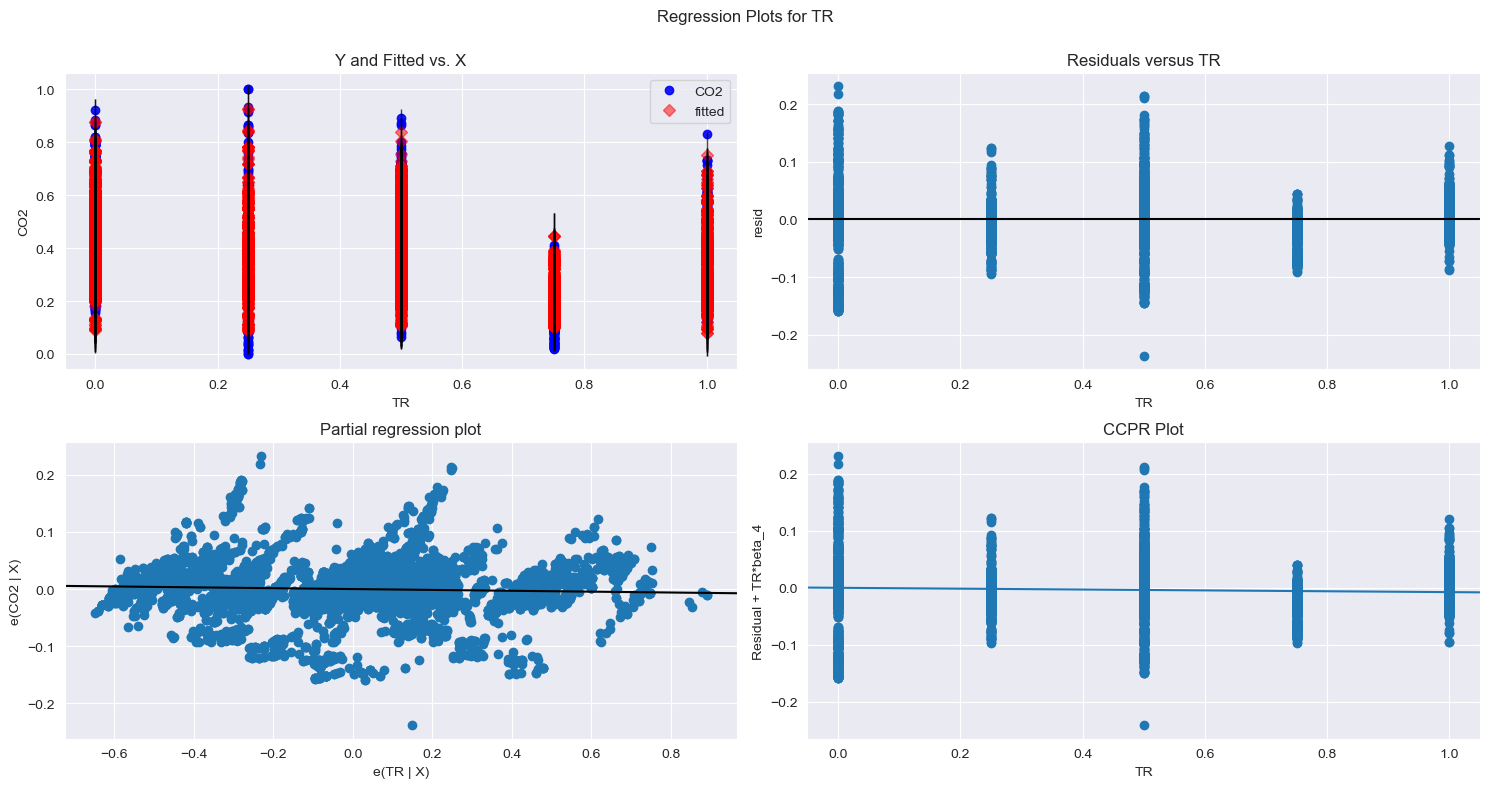

In [73]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'TR', fig=fig)
plt.show()

eval_env: 1


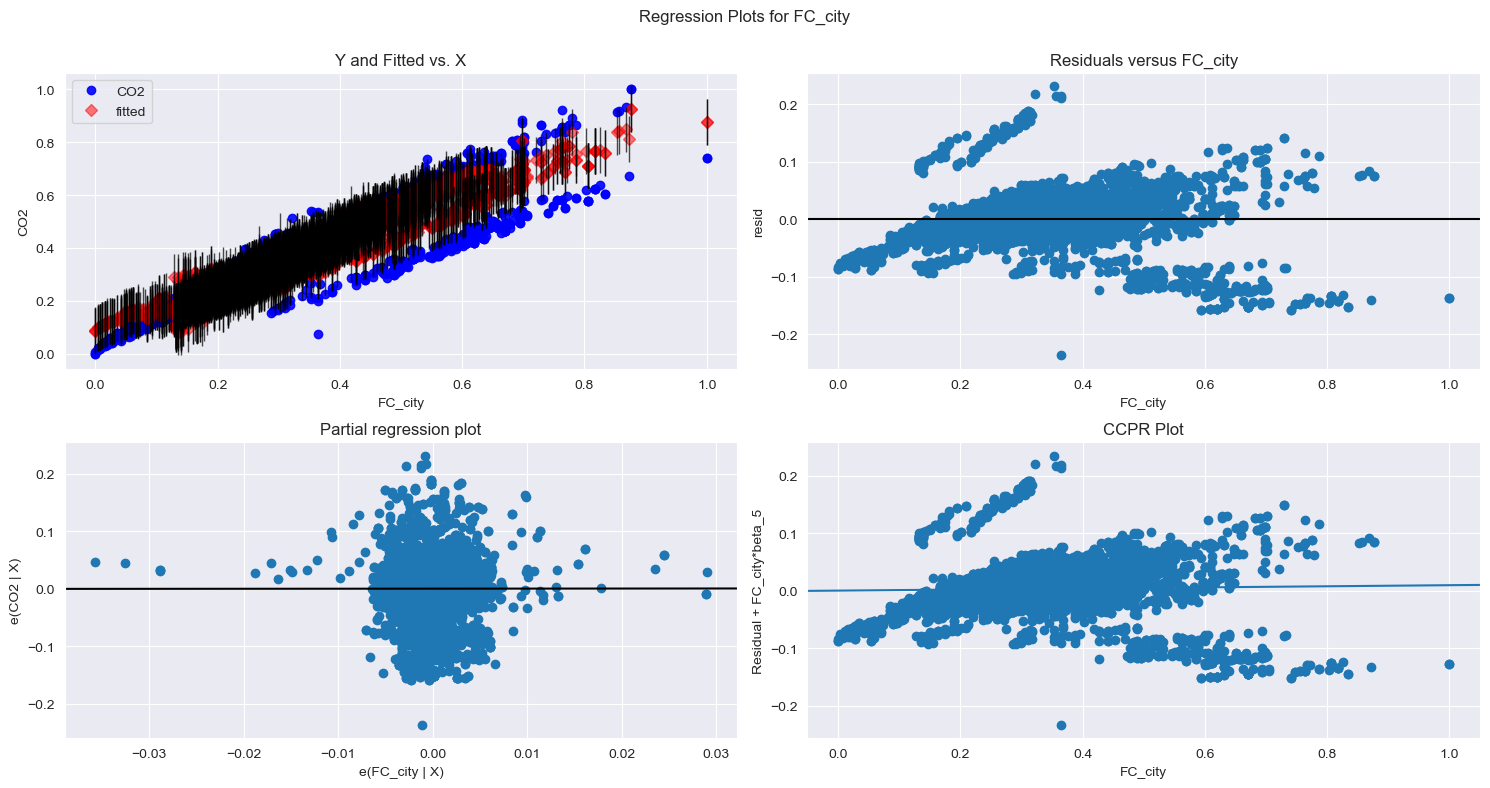

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'FC_city', fig=fig)
plt.show()

eval_env: 1


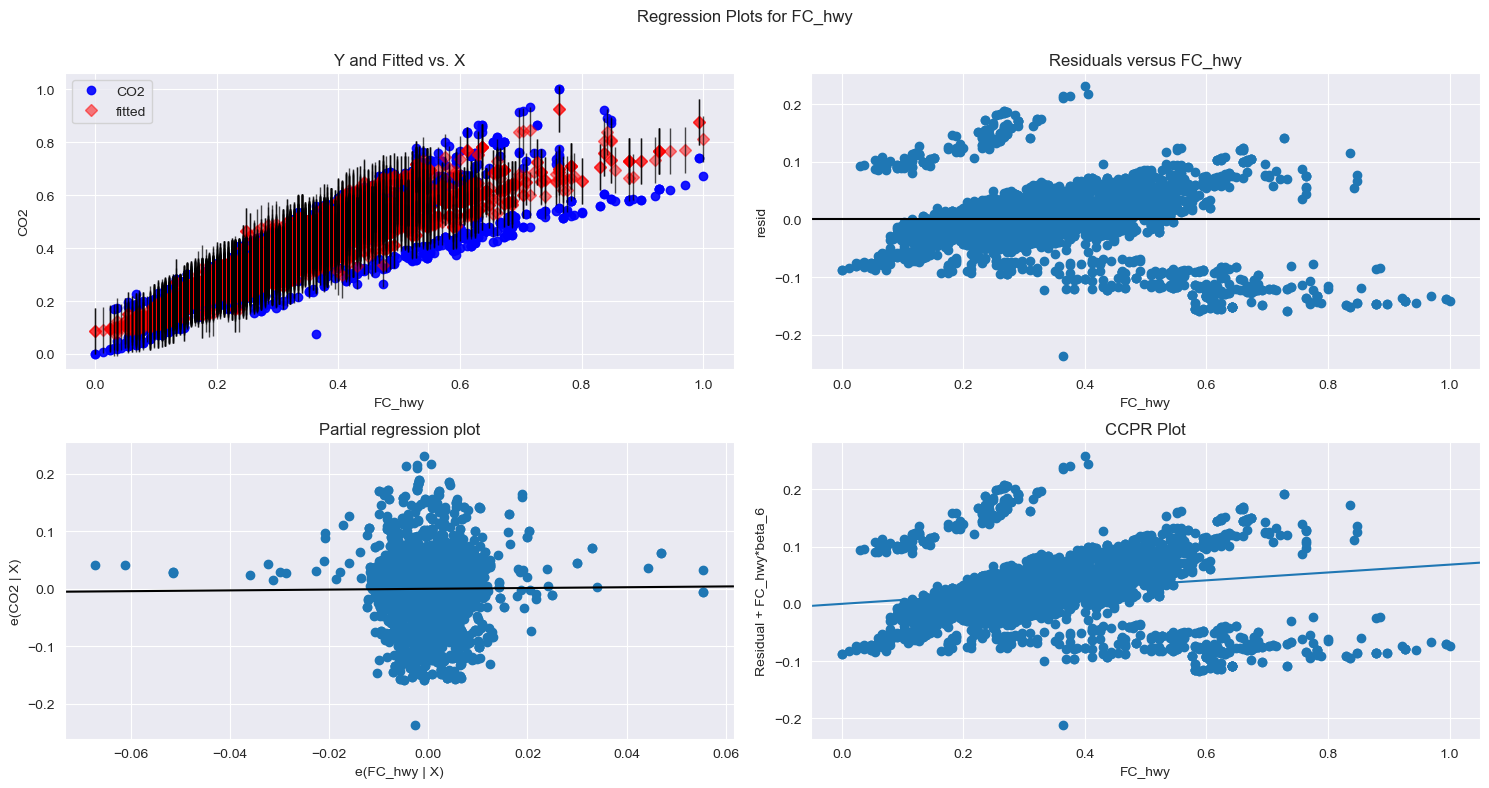

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'FC_hwy', fig=fig)
plt.show()

eval_env: 1


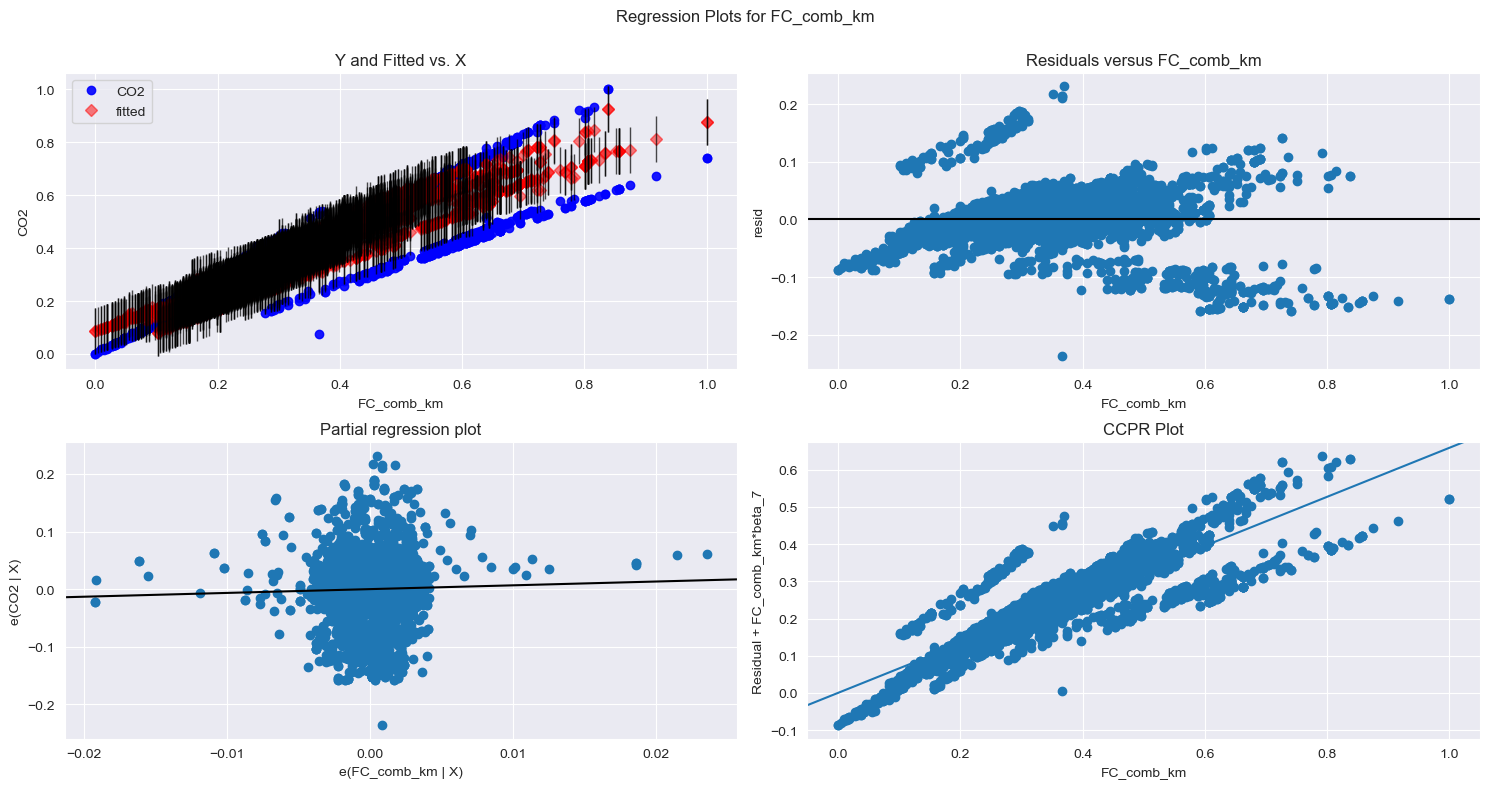

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'FC_comb_km', fig=fig)
plt.show()

## Cook's Distance:

In [77]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

In [78]:
c

array([3.94e-05, 6.60e-06, 4.73e-04, ..., 5.79e-06, 1.59e-06, 2.65e-05])

In [79]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(c)

[3.94e-05 6.60e-06 4.73e-04 ... 5.79e-06 1.59e-06 2.65e-05]


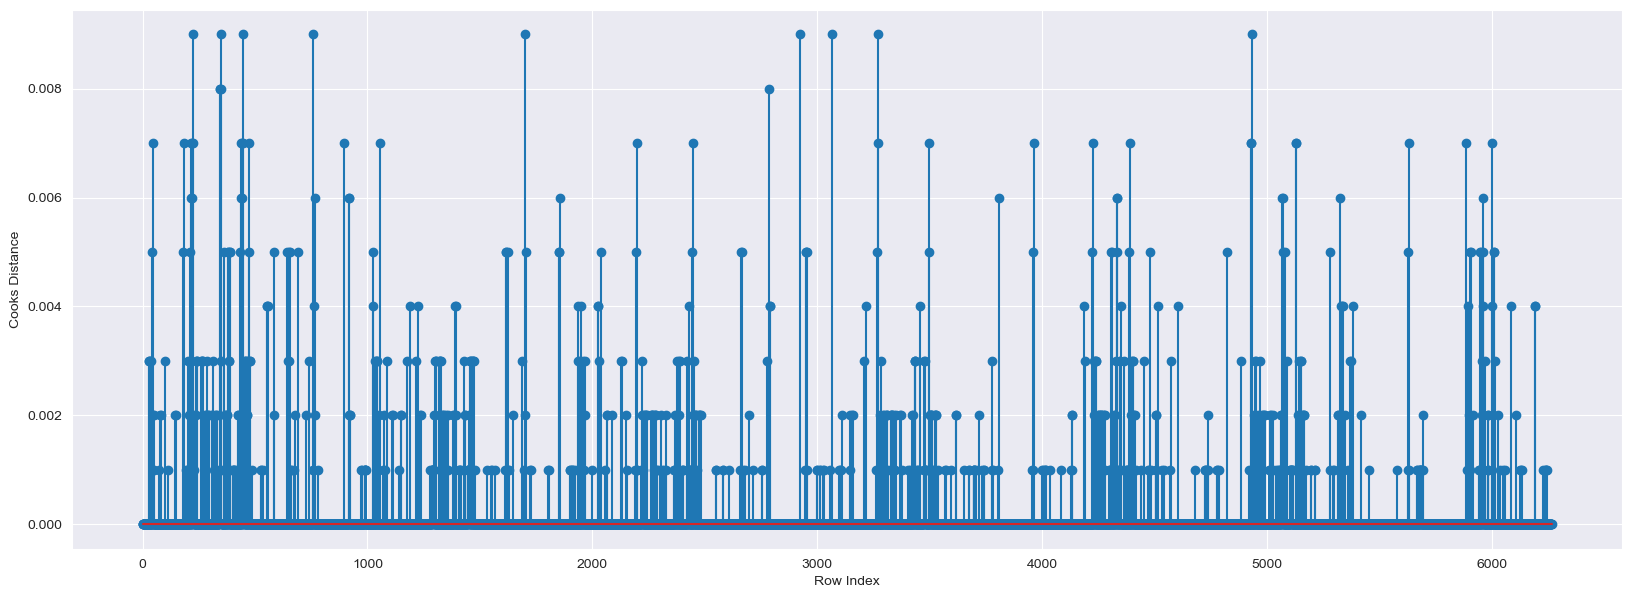

In [80]:
#Plot the influencers values using stem plot

fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [81]:
#index and value of influencer where c is more than 0.005

(np.argmax(c),np.max(c))

(225, 0.00941882409806722)

### High Influence points:

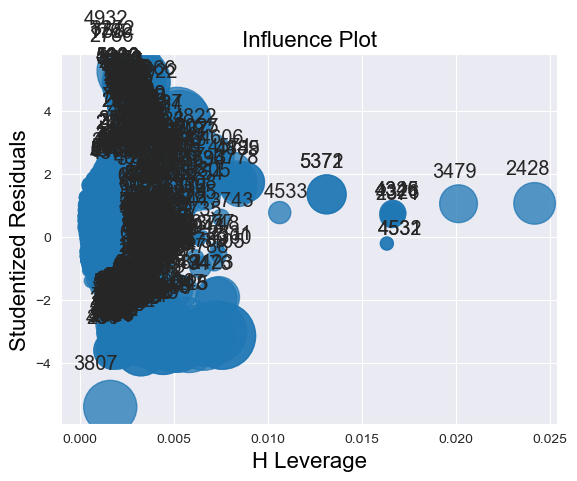

In [82]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [83]:
df2.shape

(6267, 8)

In [84]:
#k = number of variables(columns)
#n = number of observations(rows)

k=8
n=6267
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.00430828147438966

From the above plot, it is evident that data point **3807,758, 1700, 2786, 3272, 4932** are the **influencers**.

In [85]:
df2[df2.index.isin([3807,758, 1700, 2786, 3272, 4932])]

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
758,0.280000,0.230769,0.5,0.00,0.356589,0.375758,0.365741,0.535211
1700,0.280000,0.230769,0.5,0.00,0.364341,0.363636,0.365741,0.535211
2786,0.280000,0.230769,0.5,0.00,0.364341,0.363636,0.365741,0.530516
3272,0.253333,0.076923,0.0,0.00,0.321705,0.406061,0.351852,0.514085
3807,0.146667,0.076923,0.5,0.25,0.364341,0.363636,0.365741,0.075117
4932,0.253333,0.076923,0.0,0.00,0.352713,0.400000,0.370370,0.539906


In [86]:
finaldata = df2.drop(df2.index[[3807,758, 1700, 2786, 3272, 4932]]).reset_index()
finaldata

,index,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418
...,...,...,...,...,...,...,...,...,...
6256,6262,0.146667,0.076923,0.50,1.0,0.251938,0.224242,0.245370,0.288732
6257,6263,0.146667,0.076923,0.50,1.0,0.271318,0.260606,0.268519,0.319249
6258,6264,0.146667,0.076923,0.50,1.0,0.290698,0.278788,0.287037,0.338028
6259,6265,0.146667,0.076923,0.50,1.0,0.271318,0.260606,0.268519,0.319249


In [87]:
finaldata = finaldata.drop(['index'], axis = 1)
finaldata.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


In [88]:
finaldata.shape

(6261, 8)

In [89]:
finalmodel = smf.ols('CO2~ES+CYL+TR+FT+FC_city+FC_hwy+FC_comb_km', data=finaldata).fit()

In [90]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     8182.
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:12:02   Log-Likelihood:                 10749.
No. Observations:                6261   AIC:                        -2.148e+04
Df Residuals:                    6253   BIC:                        -2.143e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0052      0.003     -1.733      0.083      -0.011       0.001
ES             0.1106      0.009     12.319      0.000       0.093       0.128
CYL            0.1125      0.011     10.220      0.000       0.091       0.134
TR            -0.0076      0.002     -4.211      0.000      -0.011      -0.004
FT             0.0994      0.003     36.952      0.000       0.094       0.105
FC_city        0.0331      0.188      0.176      0.860      -0.336       0.402
FC_hwy         0.0760      0.099      0.766      0.444      -0.119       0.271
FC_comb_km     0.6295      0.286      2.203      0.028       0.069       1.190
==============================================================================
Omnibus:                      503.126   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2966.865
Skew:                          -0.077   Prob(JB):                         0.00
Kurtosis:                       6.369   Cond. No.                         991.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
finalmodel.rsquared, finalmodel.rsquared_adj

(0.901564160195865, 0.9014539649490029)

In [92]:
ols_rsquared = finalmodel.rsquared*100
ols_rsquared

90.1564160195865

In [93]:
finalmodel.params

Intercept    -0.005205
ES            0.110582
CYL           0.112496
TR           -0.007607
FT            0.099401
FC_city       0.033114
FC_hwy        0.075990
FC_comb_km    0.629527
dtype: float64

In [94]:
finalmodel.fittedvalues

0       0.263252
1       0.303680
2       0.169051
3       0.393099
4       0.375914
          ...   
6256    0.295115
6257    0.313092
6258    0.326773
6259    0.313092
6260    0.339533
Length: 6261, dtype: float64

In [95]:
finalmodel.resid

0      -0.028510
1      -0.010253
2      -0.075155
3      -0.019859
4      -0.028496
          ...   
6256   -0.006382
6257    0.006157
6258    0.011255
6259    0.006157
6260    0.017274
Length: 6261, dtype: float64

In [96]:
df4 = finaldata.copy()
df4.head(2)

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.5,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.0,1.0,0.271318,0.224242,0.254630,0.293427


In [97]:
df4['CO2_predicted'] = (-0.005205) + 0.110582*df4['ES'] + 0.112496*df4['CYL'] +(-0.007607)*df4['TR'] + 0.099401*df4['FT']  + (0.033114)*df4['FC_city']+ (0.075990)*df4['FC_hwy']+ 0.629527*df4['FC_comb_km']
df4['CO2_predicted_model'] = finalmodel.fittedvalues
df4.head(10)

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2,CO2_predicted,CO2_predicted_model
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742,0.263252,0.263252
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427,0.303680,0.303680
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897,0.169052,0.169051
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239,0.393099,0.393099
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418,0.375914,0.375914
5,0.346667,0.230769,0.50,1.0,0.298450,0.224242,0.273148,0.314554,0.353565,0.353565
6,0.346667,0.230769,0.50,1.0,0.294574,0.248485,0.277778,0.319249,0.358194,0.358193
7,0.373333,0.230769,0.50,1.0,0.333333,0.303030,0.324074,0.373239,0.395716,0.395715
8,0.373333,0.230769,1.00,1.0,0.356589,0.333333,0.347222,0.401408,0.409557,0.409557
9,0.200000,0.076923,0.50,1.0,0.248062,0.212121,0.236111,0.272300,0.294134,0.294134


In [98]:
y = df4['CO2']
y_predicted = df4['CO2_predicted_model']

In [99]:
mae_final = metrics.mean_absolute_error(y, y_predicted)
mse_final = metrics.mean_squared_error(y, y_predicted)
rmse_final = np.sqrt(mse) # or mse**(0.5)  
r2_final = metrics.r2_score(y,y_predicted)

print("Results of sklearn.metrics:")
print("MAE:",mae_final)
print("MSE:", mse_final)
print("RMSE:", rmse_final)
print("R-Squared (Accuracy):", r2_final)

Results of sklearn.metrics:
MAE: 0.02941638884619685
MSE: 0.0018891330077572327
RMSE: 0.04398229537026772
R-Squared (Accuracy): 0.901564160195865


**The Accuracy of the model is improved to 90.15 %**

## 2. Linear Regression using Train Test Split Method:

In [100]:
X = finaldata.drop(['CO2'], axis=1)
y = finaldata['CO2']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [102]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4382, 7), (4382,), (1879, 7), (1879,))

In [103]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = clf.predict(X_test)
y_pred

array([0.63, 0.45, 0.57, ..., 0.49, 0.34, 0.32])

In [105]:
print(round(clf.score(X_test,y_test),4)*100,'%')

90.45 %


In [106]:
r2 = r2_score(y_test, y_pred)
r2score =r2*100
r2score

90.4491684417802

**The Accuracy of the model is improved to 90.44%**

In [107]:
train_pred = clf.predict(X_train)

In [108]:
train_pred.shape

(4382,)

## Model Evaluation:

**1. Mean Squared Error (MSE)**

**2. Root Mean Squared Error (RMSE)**

**3. Mean Absolute Error (MAE)**

In [109]:
mse_test = mean_squared_error(y_test,y_pred)
rmse_test = round(np.sqrt(mse_test), 4)
mae_test = round(mean_absolute_error(y_test, y_pred),4)

print("Mean Squared Error (MSE) on test set: ", mse_test)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Squared Error (MSE) on test set:  0.0018386645664931782
Root Mean Squared Error (RMSE) on test set:  0.0429
Mean Absolute Error (MAE) on test set:  0.0287


### Result Table:

In [110]:
d1 = {'Model Name':['Multiple Linear Regression using OLS method', 'Multiple Linear Regression using Train Test Split'], 'Model Accuracy':[ols_rsquared,r2score],'MSE':[mse_final,mse_test],'RMSE':[rmse_final,rmse_test],'MAE':[mae_final, mae_test]}
Result_Table = pd.DataFrame(d1)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700


**Preparing Dataframes for other models:**

In [111]:
#DF after performing EDA:

print(df1.shape)
df1.head()

(6267, 8)


,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,2.0,4,2,4,9.9,6.7,8.5,196
1,2.4,4,4,4,11.2,7.7,9.6,221
2,1.5,4,3,4,6.0,5.8,5.9,136
3,3.5,6,2,4,12.7,9.1,11.1,255
4,3.5,6,2,4,12.1,8.7,10.6,244


In [112]:
#Normalised DF after Scaling the data:

print(df2.shape)
df2.head()

(6267, 8)


,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


In [113]:
#Normalised DF used for Manual calculation of Predicted Values(OLS method): 

print(df3.shape)
df3.head()

(6267, 10)


,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2,CO2_predicted,CO2_predicted_model
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742,0.262791,0.262791
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427,0.303076,0.303076
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897,0.169049,0.169049
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239,0.392823,0.392824
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418,0.375685,0.375685


In [114]:
#Normalised DF after removing the high influence points:

print(finaldata.shape)
finaldata.head()

(6261, 8)


,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


In [115]:
#Denormalised original form of data without outliers, influencers and duplicated values: 


denormed_df = df1.drop(df1.index[[3807,758, 1700, 2786, 3272, 4932]])
denormed_df.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,2.0,4,2,4,9.9,6.7,8.5,196
1,2.4,4,4,4,11.2,7.7,9.6,221
2,1.5,4,3,4,6.0,5.8,5.9,136
3,3.5,6,2,4,12.7,9.1,11.1,255
4,3.5,6,2,4,12.1,8.7,10.6,244


In [116]:
denormed_df.shape

(6261, 8)

## 3. Model Building using Random Forest:

In [117]:
from sklearn.ensemble import RandomForestRegressor 

In [118]:
## Splitting data into target variable and independent variables:

x = finaldata.drop('CO2', axis=1)
y = finaldata['CO2']

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [120]:
model = RandomForestRegressor(n_jobs=-1)

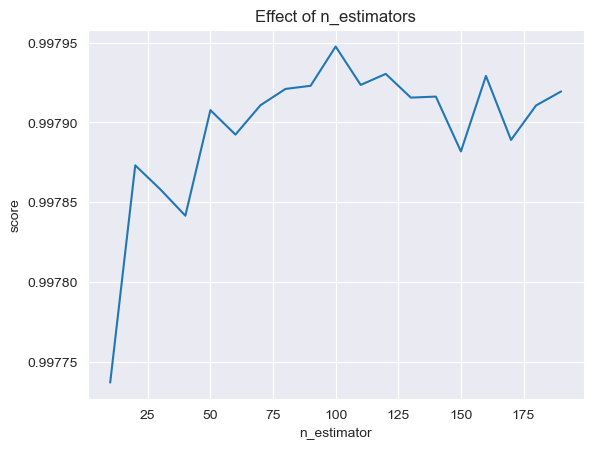

In [121]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [122]:
scores

[0.997737158313837,
 0.9978731098247856,
 0.9978581140663534,
 0.9978415890264265,
 0.9979076627939873,
 0.9978923540105099,
 0.9979107591426815,
 0.9979209462797496,
 0.9979229032254637,
 0.9979474694541467,
 0.9979234535973864,
 0.9979303599994035,
 0.997915506930897,
 0.9979161420449348,
 0.9978818163375823,
 0.9979290884433204,
 0.9978890259264376,
 0.9979105903981513,
 0.9979193649200006]

In [123]:
rf_score = np.mean(scores)*100
#rf_accuracy = print(round(rf_score * 100,4))
print(rf_score)

99.78961797229505


In [124]:
y_pred = model.predict(x_test)
y_pred

array([0.45, 0.32, 0.08, ..., 0.45, 0.26, 0.28])

In [125]:
rmse_rf = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
mse_rf =float(format((mean_squared_error(y_test, y_pred)), '.3f'))
mae_rf = float(format(np.sqrt(mean_absolute_error(y_test, y_pred)), '.3f'))

print("\nRMSE for Random Forest Model: ", rmse_rf)
print("\nMSE for Random Forest Model: ", mse_rf)
print("\nMean Absolute Error (MAE) on test set: ", mae_rf)


RMSE for Random Forest Model:  0.006

MSE for Random Forest Model:  0.0

Mean Absolute Error (MAE) on test set:  0.067


### Result Table:

In [126]:
new_row = {'Model Name':'Random Forest Regressor','Model Accuracy':rf_score,'MSE':mse_rf,'RMSE':rmse_rf,'MAE':mae_rf}

Result_Table = Result_Table.append(new_row, ignore_index=True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000


## 4. Bagging Regressor:

In [127]:
X = finaldata.drop(['CO2'], axis =1)
y = finaldata['CO2']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Bagging with Random Forest:

bagging_regressor = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=42)
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), random_state=42)

In [130]:
# Make predictions:

y_pred_bagging = bagging_regressor.predict(X_test)

In [131]:
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = round(np.sqrt(mse_bagging),4)
mae_bagging = round(mean_absolute_error(y_test, y_pred_bagging),4)

print(f"Bagging with Random Forest MSE: {mse_bagging}")
print(f"Bagging with Random Forest RMSE: {rmse_bagging}")
print(f"Bagging with Random Forest MAE: {mae_bagging}")

Bagging with Random Forest MSE: 4.552154701036828e-05
Bagging with Random Forest RMSE: 0.0067
Bagging with Random Forest MAE: 0.0047


In [132]:
Accuracy_bagging = r2_score(y_test, y_pred_bagging)*100
Accuracy_bagging

99.75754646901626

### Result Table:

In [133]:
new_row = {'Model Name': 'Bagging Regressor','Model Accuracy':Accuracy_bagging, 'MSE':mse_bagging, 'RMSE':rmse_bagging, 'MAE':mae_bagging}

Result_Table = Result_Table.append(new_row, ignore_index = True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000
3,Bagging Regressor,99.757546,0.000046,0.006700,0.004700


## 5. Gradient Boosting Regressor:

In [134]:
X = finaldata.drop(['CO2'], axis =1)
y = finaldata['CO2']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Boosting with Gradient Boosting Regressor:

boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [137]:
# Make predictions:

y_pred_boosting = boosting_regressor.predict(X_test)

In [138]:
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
rmse_boosting = round(np.sqrt(mse_boosting),4)
mae_boosting = round(mean_absolute_error(y_test, y_pred_boosting),4)

print(f"Bagging with Random Forest MSE: {mse_boosting}")
print(f"Bagging with Random Forest RMSE: {rmse_boosting}")
print(f"Bagging with Random Forest MAE: {mae_boosting}")

Bagging with Random Forest MSE: 5.943861294225564e-05
Bagging with Random Forest RMSE: 0.0077
Bagging with Random Forest MAE: 0.0059


In [139]:
Accuracy_boosting = r2_score(y_test, y_pred_boosting)*100
Accuracy_boosting

99.68342241133979

### Result Table:

In [140]:
new_row = {'Model Name': 'Gradient Boosting Regressor','Model Accuracy':Accuracy_boosting, 'MSE':mse_boosting, 'RMSE':rmse_boosting, 'MAE':mae_boosting}

Result_Table = Result_Table.append(new_row, ignore_index = True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000
3,Bagging Regressor,99.757546,0.000046,0.006700,0.004700
4,Gradient Boosting Regressor,99.683422,0.000059,0.007700,0.005900


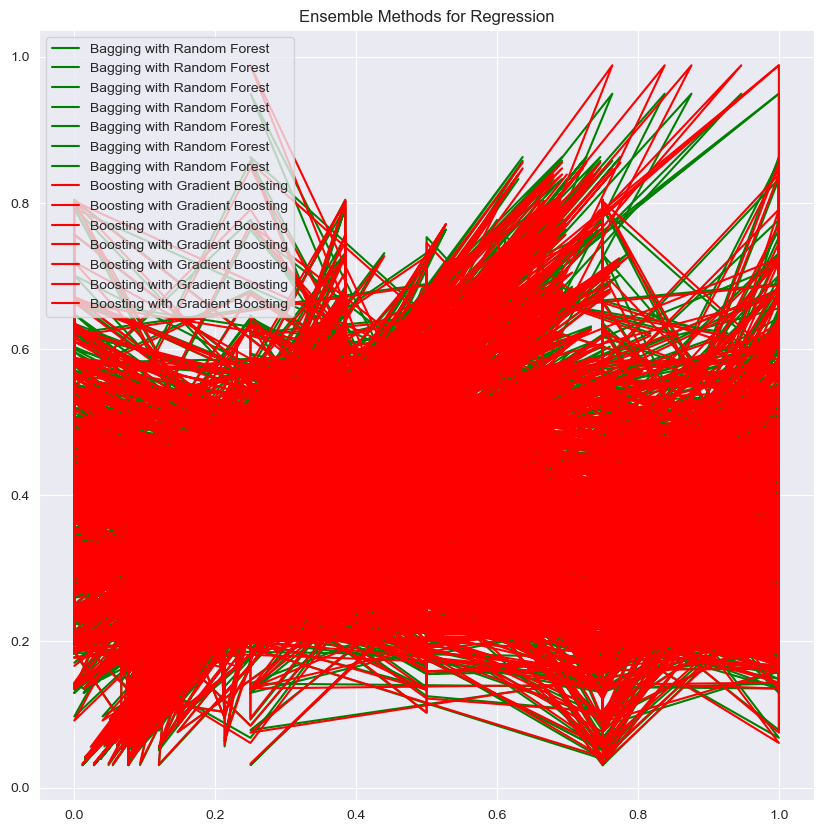

In [141]:
# Plotting the results: 
plt.figure(figsize=(10, 10))
plt.plot(X_test, y_pred_bagging, color='green', label='Bagging with Random Forest')
plt.plot(X_test, y_pred_boosting, color='red', label='Boosting with Gradient Boosting')
plt.title("Ensemble Methods for Regression")
plt.legend()
plt.show()

## 6. Model Building using KNN Regressor:

In [142]:
finaldata.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


In [143]:
finaldata.shape

(6261, 8)

In [144]:
knnarray = finaldata.values

In [145]:
x = knnarray[:, 0:7]
y = knnarray[:,7]

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [147]:
x_train

array([[0.28, 0.23, 0.5 , ..., 0.29, 0.24, 0.27],
       [0.09, 0.08, 0.  , ..., 0.13, 0.06, 0.11],
       [0.47, 0.38, 0.5 , ..., 0.38, 0.34, 0.37],
       ...,
       [0.2 , 0.08, 0.5 , ..., 0.26, 0.31, 0.28],
       [0.15, 0.08, 1.  , ..., 0.19, 0.18, 0.19],
       [0.63, 0.38, 0.  , ..., 0.53, 0.53, 0.53]])

In [148]:
x_test

array([[0.64, 0.38, 0.  , ..., 0.41, 0.32, 0.38],
       [0.2 , 0.08, 0.  , ..., 0.28, 0.27, 0.27],
       [0.15, 0.08, 0.25, ..., 0.07, 0.07, 0.07],
       ...,
       [0.21, 0.08, 1.  , ..., 0.39, 0.39, 0.39],
       [0.2 , 0.08, 0.5 , ..., 0.22, 0.19, 0.21],
       [0.21, 0.08, 0.5 , ..., 0.24, 0.24, 0.24]])

In [149]:
y_train

array([0.32, 0.18, 0.44, ..., 0.34, 0.22, 0.62])

In [150]:
y_test

array([0.45, 0.33, 0.08, ..., 0.45, 0.26, 0.28])

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [152]:
#Build a model (KNN for Regression)

from sklearn.neighbors import KNeighborsRegressor
reg_cv = KNeighborsRegressor(n_neighbors = 3,  weights = 'distance', p=1)
reg_cv.fit(x, y)
score = cross_val_score(reg_cv, x, y, cv = 5)
result = np.mean(score)
print(result)

#Cross Validation:

kfold = KFold(n_splits=5)
print("CV, KFold:\n{}".format(cross_val_score(KNeighborsRegressor(), x, y, cv=kfold)))

0.992028810855292
CV, KFold:
[0.98 0.99 0.99 0.99 0.99]


In [153]:
train_preds = reg_cv.predict(x_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = np.sqrt(mse)
r2_score_train_knn = r2_score(y_train, train_preds)*100

print('RMSE (train) =',rmse_train)
print('MSE (train)=',mse_train)
print('Training Accuracy=',r2_score_train_knn)

RMSE (train) = 0.04398229537026772
MSE (train)= 9.809385414337828e-06
Training Accuracy= 99.94893088476746


In [154]:
test_preds= reg_cv.predict(x_test)

mse_test_knn = mean_squared_error(y_test,test_preds)
rmse_test_knn = round(np.sqrt(mse_test), 4)
mae_test_knn = round(mean_absolute_error(y_test, test_preds),4)

r2_score_test_knn = r2_score(y_test, test_preds)*100

print("Mean Squared Error (MSE) on test set: ", mse_test_knn)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test_knn)
print("Mean Absolute Error (MAE) on test set: ", mae_test_knn)

print('Model Accuracy =',r2_score_test_knn)

Mean Squared Error (MSE) on test set:  8.964419640004568e-06
Root Mean Squared Error (RMSE) on test set:  0.0429
Mean Absolute Error (MAE) on test set:  0.0012
Model Accuracy = 99.9531624534873


### Result Table:

In [155]:
new_row = {'Model Name': 'Regression using K- Nearest Neighbour','Model Accuracy':r2_score_test_knn, 'MSE':mse_test_knn, 'RMSE':rmse_test_knn, 'MAE':mae_test_knn}

Result_Table = Result_Table.append(new_row, ignore_index = True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000
3,Bagging Regressor,99.757546,0.000046,0.006700,0.004700
4,Gradient Boosting Regressor,99.683422,0.000059,0.007700,0.005900
5,Regression using K- Nearest Neighbour,99.953162,0.000009,0.042900,0.001200


## 7. Model Building using Logistic Regression:

In [156]:
denormed_df.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,2.0,4,2,4,9.9,6.7,8.5,196
1,2.4,4,4,4,11.2,7.7,9.6,221
2,1.5,4,3,4,6.0,5.8,5.9,136
3,3.5,6,2,4,12.7,9.1,11.1,255
4,3.5,6,2,4,12.1,8.7,10.6,244


In [157]:
denormed_df.shape

(6261, 8)

In [158]:
x = denormed_df.drop('CO2', axis=1)
y = denormed_df['CO2']

In [159]:
y_binary = (y > np.median(y)).astype(int)

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x,y_binary,train_size = 0.8, random_state=42)

In [161]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [162]:
y_pred = model_lr.predict(x_test)
y_pred_proba = model_lr.predict_proba(x_test)[:, 1]

In [163]:
accuracy_lr = accuracy_score(y_test, y_pred)*100
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

In [164]:
print(f"Accuracy: {accuracy_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"MAE: {mae_lr}")
print(f"AUC: {auc}")

Accuracy: 94.33359936153232
MSE: 0.05666400638467677
RMSE: 0.23804202650934725
MAE: 0.05666400638467677
AUC: 0.9861497080794432


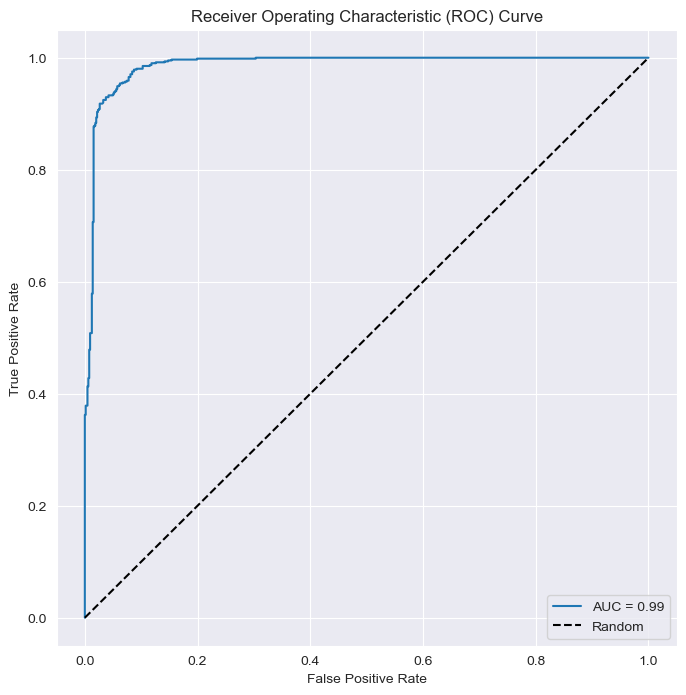

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Result Table:

In [166]:
new_row = {'Model Name': 'Logistic Regression','Model Accuracy':accuracy_lr, 'MSE':mse_lr, 'RMSE':rmse_lr, 'MAE':mae_lr}

Result_Table = Result_Table.append(new_row, ignore_index = True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000
3,Bagging Regressor,99.757546,0.000046,0.006700,0.004700
4,Gradient Boosting Regressor,99.683422,0.000059,0.007700,0.005900
5,Regression using K- Nearest Neighbour,99.953162,0.000009,0.042900,0.001200
6,Logistic Regression,94.333599,0.056664,0.238042,0.056664


## 8. Ridge Regression Model:

In [167]:
finaldata.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


In [168]:
X = finaldata.drop('CO2',axis=1)
y = finaldata['CO2']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state=42)

In [170]:
ridge = Ridge(alpha = 2)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred)


print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")

MSE: 0.0018263196769591641
RMSE: 0.042735461585890984
MAE: 0.029092020975521413


In [171]:
Accuracy_ridge = ridge.score(X_train, y_train)*100
Accuracy_ridge

90.10589131277462

### Result Table:

In [172]:
new_row = {'Model Name': 'Ridge Regression(alpha = 2)','Model Accuracy':Accuracy_ridge, 'MSE':mse_ridge, 'RMSE':rmse_ridge, 'MAE':mae_ridge}

Result_Table = Result_Table.append(new_row, ignore_index = True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000
3,Bagging Regressor,99.757546,0.000046,0.006700,0.004700
4,Gradient Boosting Regressor,99.683422,0.000059,0.007700,0.005900
5,Regression using K- Nearest Neighbour,99.953162,0.000009,0.042900,0.001200
6,Logistic Regression,94.333599,0.056664,0.238042,0.056664
7,Ridge Regression(alpha = 2),90.105891,0.001826,0.042735,0.029092


## 9. Lasso Regression Model:

In [173]:
denormed_df.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,2.0,4,2,4,9.9,6.7,8.5,196
1,2.4,4,4,4,11.2,7.7,9.6,221
2,1.5,4,3,4,6.0,5.8,5.9,136
3,3.5,6,2,4,12.7,9.1,11.1,255
4,3.5,6,2,4,12.1,8.7,10.6,244


In [174]:
X = denormed_df.drop('CO2',axis=1)
y = denormed_df['CO2']

In [175]:
y_binary = (y > np.median(y)).astype(int)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y_binary,train_size = 0.8, random_state=42)

In [177]:
alpha = 0.1
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred)


print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")

MSE: 0.10752445141367777
RMSE: 0.32790921215128704
MAE: 0.2850134298409161


In [178]:
r2_lasso = r2_score(y_test, y_pred)*100
r2_lasso

56.96036599965917

In [179]:
new_row = {'Model Name': 'Lasso Regression(alpha = 0.1)','Model Accuracy':r2_lasso, 'MSE':mse_lasso, 'RMSE':rmse_lasso, 'MAE':mae_lasso}

Result_Table = Result_Table.append(new_row, ignore_index = True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000
3,Bagging Regressor,99.757546,0.000046,0.006700,0.004700
4,Gradient Boosting Regressor,99.683422,0.000059,0.007700,0.005900
5,Regression using K- Nearest Neighbour,99.953162,0.000009,0.042900,0.001200
6,Logistic Regression,94.333599,0.056664,0.238042,0.056664
7,Ridge Regression(alpha = 2),90.105891,0.001826,0.042735,0.029092
8,Lasso Regression(alpha = 0.1),56.960366,0.107524,0.327909,0.285013


## 10. Elastic Net Regression Model:

In [180]:
finaldata.head()

,ES,CYL,TR,FT,FC_city,FC_hwy,FC_comb_km,CO2
0,0.146667,0.076923,0.50,1.0,0.220930,0.163636,0.203704,0.234742
1,0.200000,0.076923,1.00,1.0,0.271318,0.224242,0.254630,0.293427
2,0.080000,0.076923,0.75,1.0,0.069767,0.109091,0.083333,0.093897
3,0.346667,0.230769,0.50,1.0,0.329457,0.309091,0.324074,0.373239
4,0.346667,0.230769,0.50,1.0,0.306202,0.284848,0.300926,0.347418


In [181]:
X = finaldata.drop('CO2',axis=1)
y = finaldata['CO2']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state=42)

In [183]:
e_net = ElasticNet(alpha = 0.01,l1_ratio = 0.8)
e_net.fit(X_train, y_train)

y_pred = e_net.predict(X_test)


mse_e_net = mean_squared_error(y_test, y_pred)
rmse_e_net = np.sqrt(mse_e_net)
mae_e_net = mean_absolute_error(y_test, y_pred)


print(f"MSE: {mse_e_net}")
print(f"RMSE: {rmse_e_net}")
print(f"MAE: {mae_e_net}")

MSE: 0.005822434461578662
RMSE: 0.07630487836029005
MAE: 0.059023056067228775


In [184]:
Accuracy_e_net = e_net.score(X_train, y_train)*100
Accuracy_e_net

68.46780479650822

### Result Table:

In [185]:
new_row = {'Model Name': 'Elastic Net Regression(alpha = 0.01)','Model Accuracy':Accuracy_e_net, 'MSE':mse_e_net, 'RMSE':rmse_e_net, 'MAE':mae_e_net}

Result_Table = Result_Table.append(new_row, ignore_index = True)
Result_Table

,Model Name,Model Accuracy,MSE,RMSE,MAE
0,Multiple Linear Regression using OLS method,90.156416,0.001889,0.043982,0.029416
1,Multiple Linear Regression using Train Test Split,90.449168,0.001839,0.042900,0.028700
2,Random Forest Regressor,99.789618,0.000000,0.006000,0.067000
3,Bagging Regressor,99.757546,0.000046,0.006700,0.004700
4,Gradient Boosting Regressor,99.683422,0.000059,0.007700,0.005900
5,Regression using K- Nearest Neighbour,99.953162,0.000009,0.042900,0.001200
6,Logistic Regression,94.333599,0.056664,0.238042,0.056664
7,Ridge Regression(alpha = 2),90.105891,0.001826,0.042735,0.029092
8,Lasso Regression(alpha = 0.1),56.960366,0.107524,0.327909,0.285013
9,Elastic Net Regression(alpha = 0.01),68.467805,0.005822,0.076305,0.059023


In [186]:
Result_Table.describe()

,Model Accuracy,MSE,RMSE,MAE
count,10.000000,10.000000,10.000000,10.000000
mean,88.965700,0.017568,0.083517,0.056671
std,14.709985,0.036102,0.109464,0.083596
min,56.960366,0.000000,0.006000,0.001200
25%,90.118522,0.000049,0.016459,0.011600
50%,92.391384,0.001832,0.042900,0.029254
75%,99.739015,0.004839,0.068224,0.058433
max,99.953162,0.107524,0.327909,0.285013


Therefore, we can see from the above description that our ideal model is **Regression using Random Forest Regressor Model** because it has the highest accuracy score of **99.78%** with minimum **Mean Squared Error value** of 0.000000. 